# Outra coisa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [182]:
def onda_senoidal(inicio = 0, fim = 4 * np.pi, num = 100, num_fases = 10):

    if num == 100:
        num = int((fim - inicio) * 50)

    matriz_y = np.zeros(shape = (num, num_fases + 1))

    x = np.linspace(start = inicio, stop = fim, num = num)
    matriz_y[:, 0] = x

    lista = []
    for fase_atual in range(1, num_fases):

        for fase in range(1, fase_atual + 1):
            y = np.abs(np.sin(x + fase * (np.pi/fase_atual)))
            matriz_y[:, fase] = y

        maior_valor = np.max(a = matriz_y[:, 1:], axis = 1)
        media = np.mean(maior_valor)

        lista.append((fase_atual, media))

    x, y = zip(*lista)
    plt.figure(figsize = (16, 9))
    plt.plot(x, y)
    plt.axhline(y = 1, color = "k", ls = "--", lw = 0.8, zorder = 1)
    plt.scatter(x = x, y = y, marker = ".", color = "r", zorder = 5)

    for i, valor in enumerate(y):
        if i % 2 == 0:
            plt.annotate(text = f"({x[i]}, {round(valor, 3)})", xy = (x[i], valor), xycoords = "data", xytext = (x[i] + 0.2, valor - 0.03), textcoords = "data",
                        arrowprops = dict(arrowstyle = "-|>", fc = "k"))
        else:
            plt.annotate(text = f"({x[i]}, {round(valor, 3)})", xy = (x[i], valor), xycoords = "data", xytext = (x[i] + 0.2, valor - 0.01), textcoords = "data",
                        arrowprops = dict(arrowstyle = "-|>", fc = "k"))

    plt.show()

In [181]:
1 % 2

1

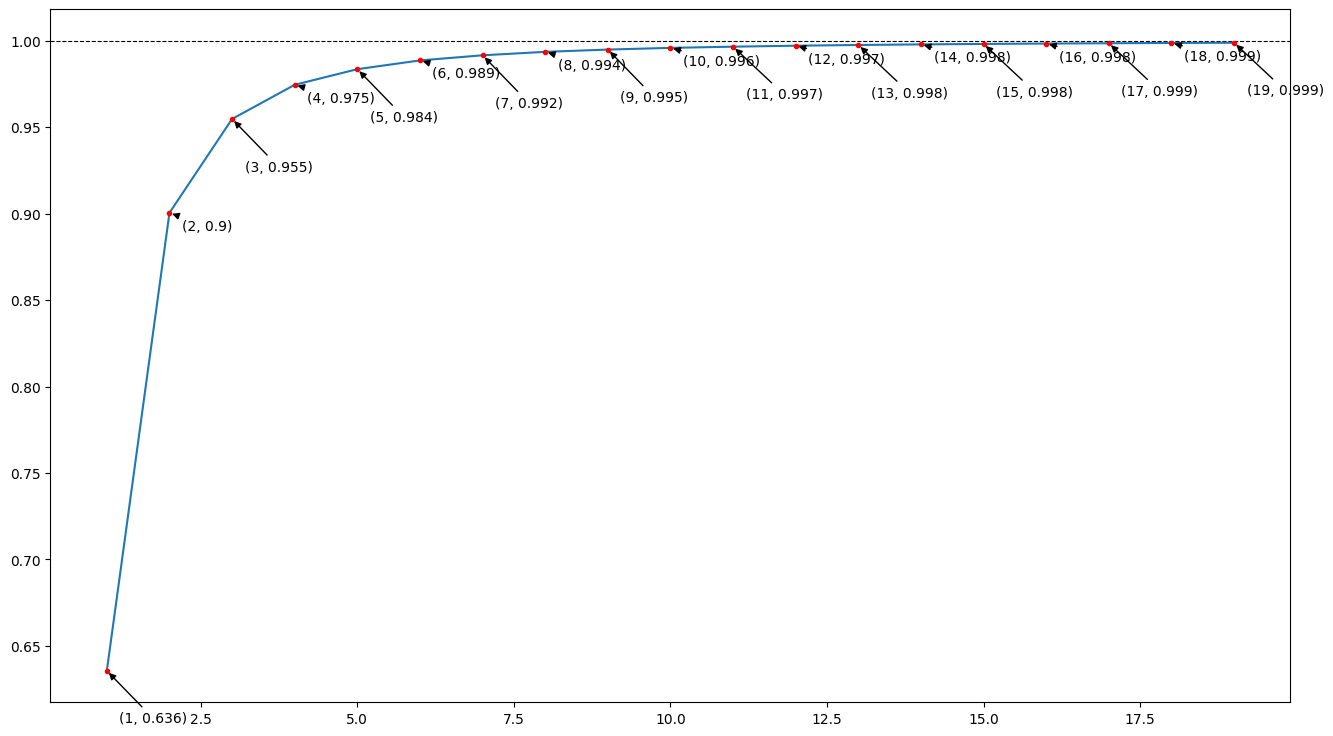

In [183]:
onda_senoidal(num_fases = 20)

In [ ]:
def onda_senoidal(inicio = 0, fim = 4 * np.pi, num = 100, num_fases = 1):

    if num == 100:
        num = int((fim - inicio) * 50)

    matriz_y = np.zeros(shape = (num, num_fases + 1))

    x = np.linspace(start = inicio, stop = fim, num = num)
    matriz_y[:, 0] = x

    for fase in range(1, num_fases + 1):
        y = np.abs(np.sin(x + fase * (np.pi/num_fases)))
        matriz_y[:, fase] = y

    plt.figure(figsize = (16, 9))
    for fase in range(1, num_fases + 1):
        plt.plot(matriz_y[:, 0], matriz_y[:, fase])
    plt.show()

    maior_valor = np.max(a = matriz_y[:, 1:], axis = 1)
    plt.figure(figsize = (16, 9))
    plt.plot(matriz_y[:, 0].ravel(), maior_valor)
    plt.axhline(y = np.mean(maior_valor), color = "r", ls = "--")
    plt.show()

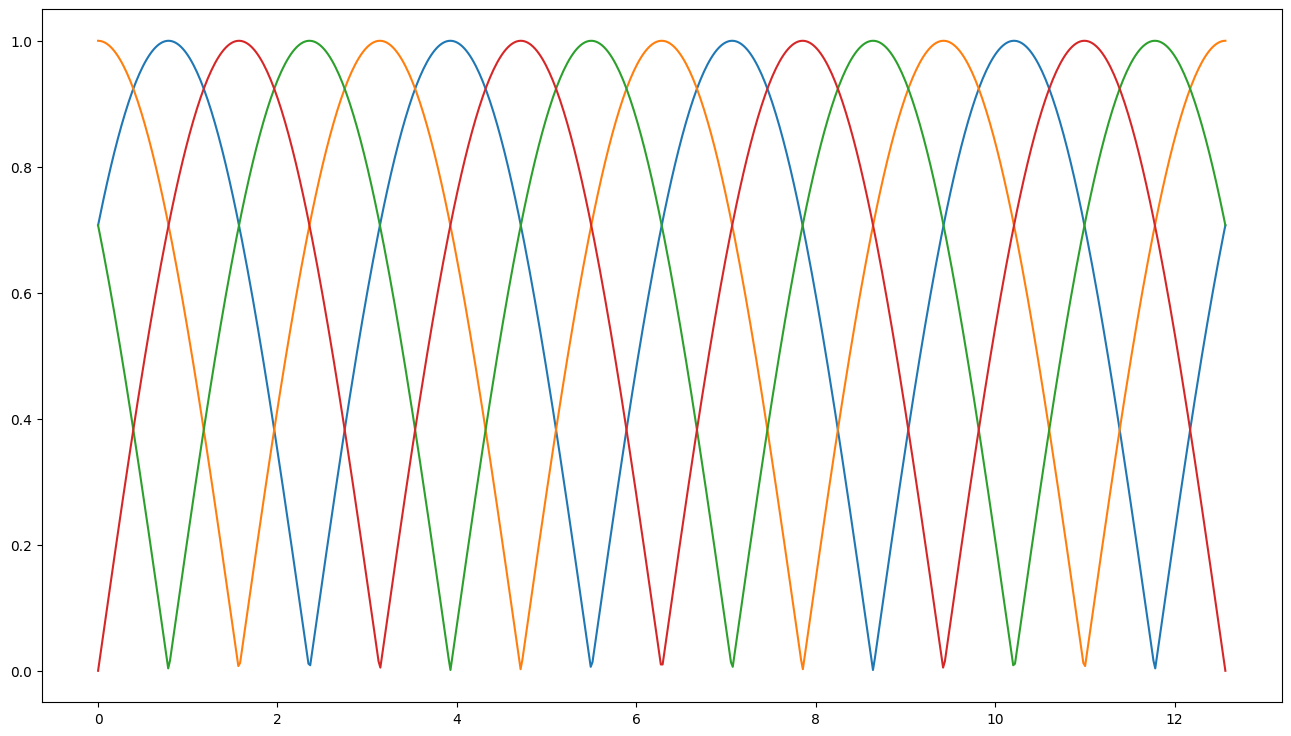

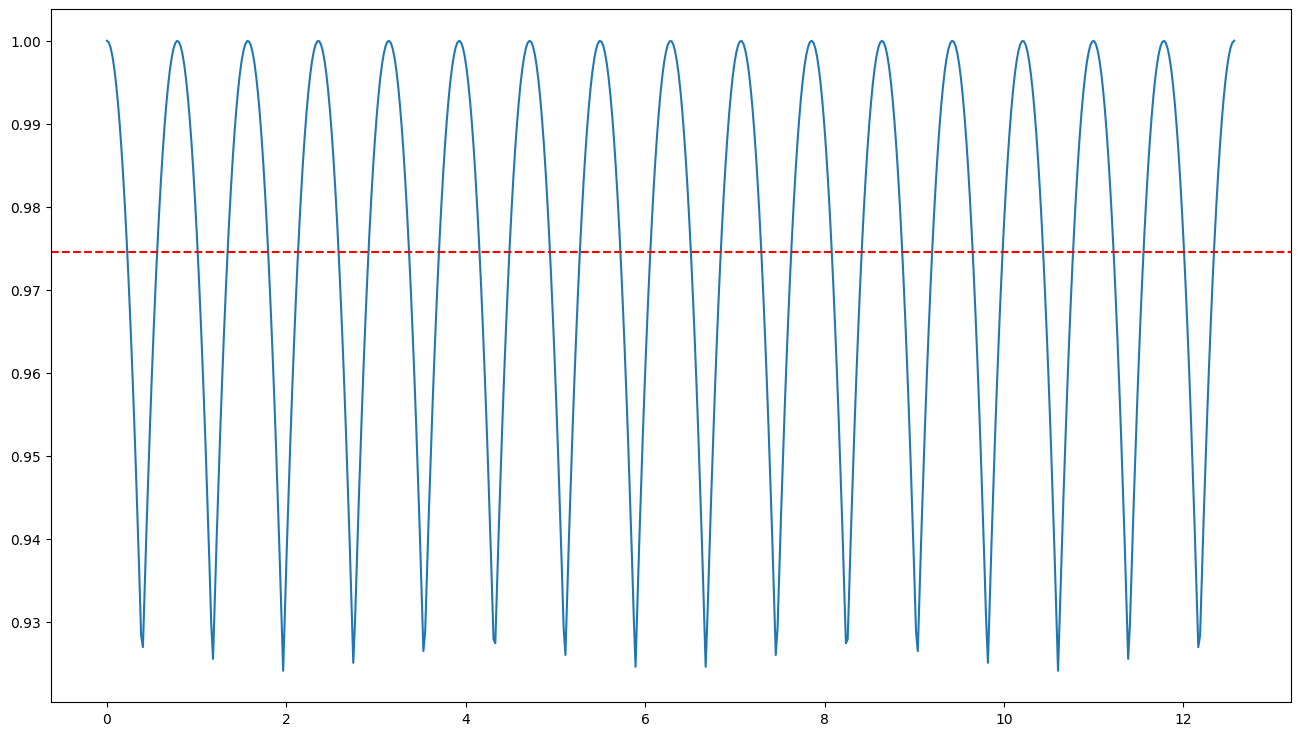

In [ ]:
onda_senoidal(num_fases = 3)

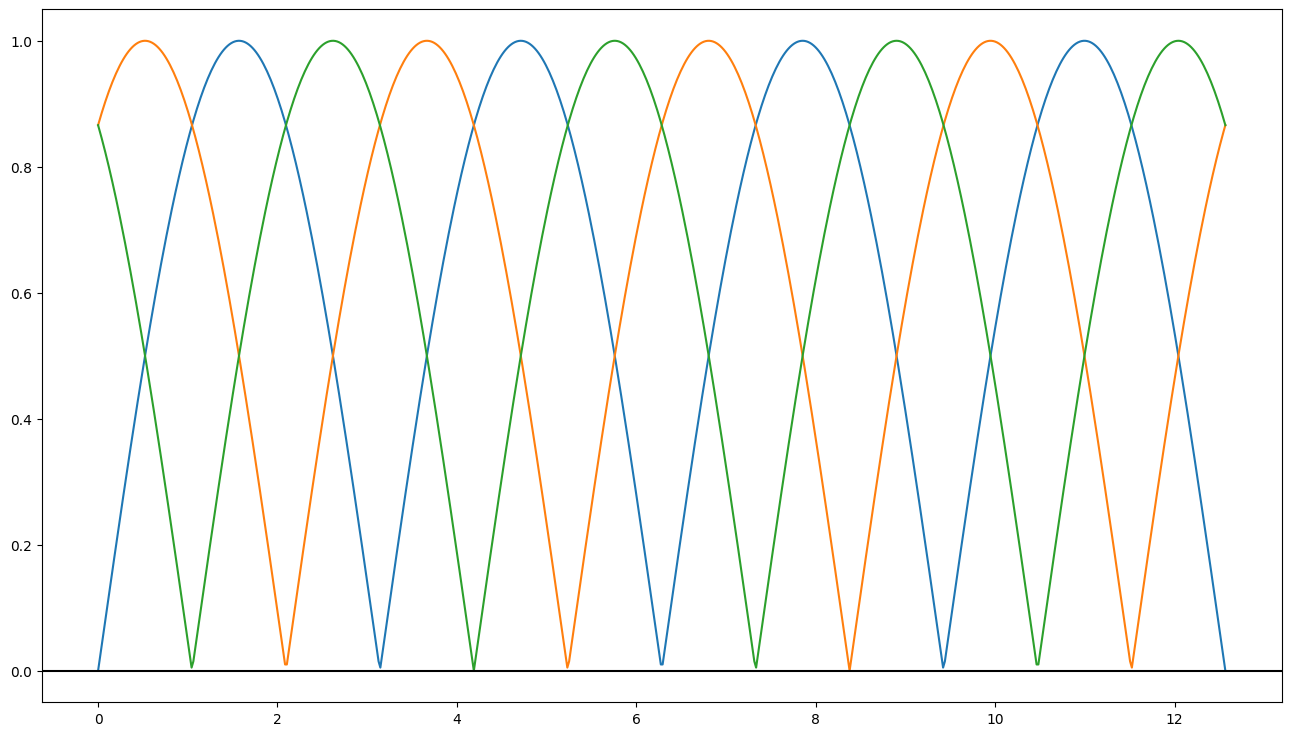

In [28]:
inicio = 0
fim = 4 * np.pi
num = int((fim - inicio) * 50)

x = np.linspace(start = inicio, stop = fim, num = num)
y1 = np.abs(np.sin(x))
y2 = np.abs(np.sin(x + np.pi/3))
y3 = np.abs(np.sin(x + 2  *np.pi/3))

plt.figure(figsize = (16, 9))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.axhline(y = 0, color = "k")
plt.show()

# Future Alaatus

## 1. Importação das bibliotecas e dos dados

In [90]:
# Importação e manipulação de dataframes
import pandas as pd

# Manipulação de matrizes
import numpy as np

# Apresentação de gráficos
import matplotlib.pyplot as plt

# Obtenção do modelo de regressão linear
from sklearn.linear_model import LinearRegression

# Métricas de desempenho do modelo
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

# Apresentação de imagens
from IPython.display import Image, display, Math

from scipy.optimize import curve_fit

In [51]:
def divisor_conjunto_treinamento_teste(df, percentual_teste = 0.2):

    """
    Divide de forma aleatória um dataframe em um conjunto de treinamento e teste considerando a coluan "id"
    """

    # Obtém a lista de índices do conjunto de dados
    lista_indices = list(set(df["id"].to_list()))

    # Obtém a quantidade de índices (bexigas)
    tamanho = len(lista_indices)

    # Obtém a quantidade de amostras para o conjunto de teste
    quantidade_teste = int(percentual_teste * tamanho)

    # Obtém os índices de teste e treinamento
    indices_teste = np.sort(np.random.randint(np.min(lista_indices), np.max(lista_indices) + 1, quantidade_teste))
    indices_treinamento = set(lista_indices) - set(indices_teste)

    df_treino = df[df["id"].isin(indices_treinamento)]
    df_teste = df[df["id"].isin(indices_teste)]

    return (df_treino, df_teste)

In [56]:
# Importa o dataframe
df = pd.read_parquet("dados_balao.parquet")

# Apresenta o dataframe
display(df.sample(3))

,caminho_imagem,nome_imagem,id,peso_gramas,segmentacoes_bexiga,media_pixels_bexiga,segmentacoes_celular,media_pixels_celular,cm2_balao
4,c:\Users\AriosvaldoBarros\Desktop\future_alaat...,20241201_161528.jpg,1,114,1,132268.0,0,0.0,inf
15,c:\Users\AriosvaldoBarros\Desktop\future_alaat...,20241201_162934.jpg,4,535,1,452948.0,2,383291.0,121.387715
163,c:\Users\AriosvaldoBarros\Desktop\future_alaat...,20250518_203458.jpg,32,3003,1,1868229.0,1,537888.0,356.774055


## 2. Observação das principais métricas estatísticas dos dados

In [57]:
# Apresenta as estatísticas gerais do dataframe
df.describe().round(decimals = 2)

,id,peso_gramas,segmentacoes_bexiga,media_pixels_bexiga,segmentacoes_celular,media_pixels_celular,cm2_balao
count,177.00,177.00,177.00,177.00,177.00,177.00,177.00
mean,17.89,1368.48,0.99,1539727.11,1.29,693655.99,inf
std,9.79,944.73,0.11,1466228.04,0.81,697442.34,NaN
min,1.00,59.00,0.00,0.00,0.00,0.00,0.00
25%,10.00,675.00,1.00,433891.00,1.00,183191.00,138.72
50%,18.00,1170.00,1.00,919137.00,2.00,464968.50,220.57
75%,27.00,1813.00,1.00,2168654.00,2.00,1037780.00,405.29
max,34.00,3948.00,1.00,6361092.00,2.00,2763285.00,inf


Realiza uma filtragem dos dados

In [58]:
# Remove as linhas que possuem a área do balão igual à zero ou infinito
df = df[(df["cm2_balao"] != 0) & (df["cm2_balao"] != float("inf"))].reset_index(drop = True)

# Remove algumas colunas irrelevantes
df.drop(columns = ["caminho_imagem", "nome_imagem"], inplace = True)

# Apresenta as estatísticas gerais do dataframe
df.describe().round(decimals = 2)

,id,peso_gramas,segmentacoes_bexiga,media_pixels_bexiga,segmentacoes_celular,media_pixels_celular,cm2_balao
count,136.00,136.00,136.0,136.00,136.00,136.00,136.00
mean,16.54,1264.21,1.0,1636969.07,1.65,896007.57,199.41
std,9.25,880.00,0.0,1423456.99,0.48,672565.98,102.85
min,1.00,59.00,1.0,150781.00,1.00,142775.00,26.20
25%,9.00,664.75,1.0,657378.50,1.00,386776.62,130.14
50%,16.00,1046.00,1.0,972351.00,2.00,638487.00,174.69
75%,24.00,1736.00,1.0,2170713.00,2.00,1243894.88,261.73
max,34.00,3948.00,1.0,6361092.00,2.00,2763285.00,552.21


In [59]:
# Divide o dataframe em conjuto de treino e teste
df_treino, df_teste = divisor_conjunto_treinamento_teste(df, percentual_teste = 0.2)

# Obtendo a matriz de projeto e o vetor de rótulos, respectivamente
X = df["cm2_balao"].to_numpy()
y = df["peso_gramas"].to_numpy()

X_treino = df_treino["cm2_balao"].to_numpy()
y_treino = df_treino["peso_gramas"].to_numpy()

X_teste = df_teste["cm2_balao"].to_numpy()
y_teste = df_teste["peso_gramas"].to_numpy()

## 3. Considerando que os dados apresentam o seguinte comportamento

$$

\begin{array}{c}

    \Large \textrm{peso} = a(\textrm{área}) + b

\end{array}

$$

Onde:
* `peso` é o valor previsto do peso da bexiga em gramas,
* `área` é a área em cm^2 da bexiga extraída através da imagem,
* `a` e `b` são pesos que o modelo deverá encontrar para reduzir o erro.

Treina o modelo de previsão do peso

In [18]:
# Obtendo a matriz de projeto e o vetor de rótulos, respectivamente
X = df["cm2_balao"].to_numpy()
y = df["peso_gramas"].to_numpy()

# Cria a instância da Regressão Linear do scikit-learn
model = LinearRegression()

# Treina o modelo
model.fit(X = X.reshape(-1, 1), y = y)

LinearRegression()

Apresenta o gráfico

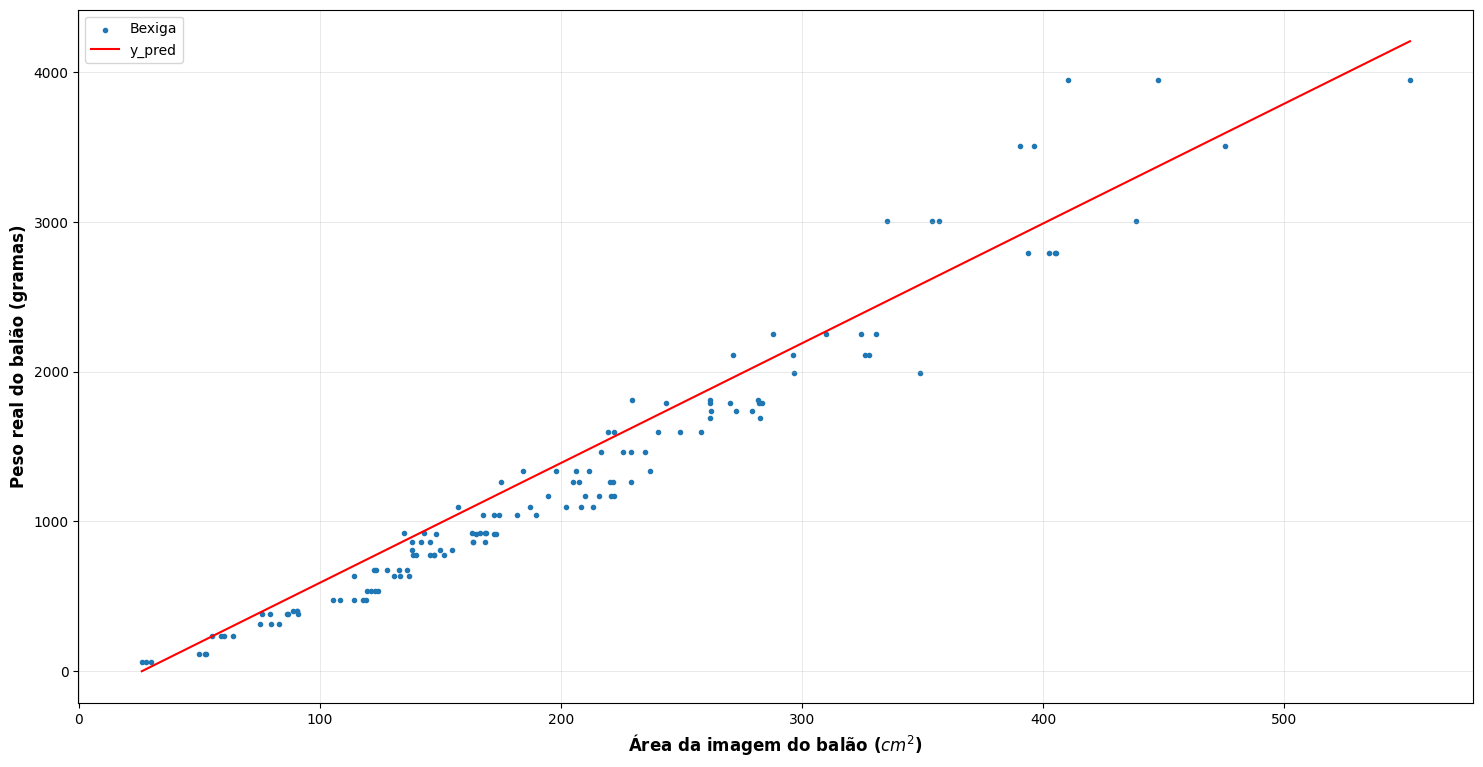

In [19]:
# Obtém o valor mínimo e máximo de X
x_min, x_max = X.min(), X.max()

# Obtém o valor mínimo e máximo dos valores previstos
y_pred_min, y_pred_max = model.predict(x_min.reshape(-1, 1)), model.predict(x_max.reshape(-1, 1))

# Impede que o modelo forneça valores negativos
y_pred_min = np.clip(a = y_pred_min, a_min = 0, a_max = float("inf"))

# Define o tamanho do gráfico
plt.figure(figsize = (18, 9))

# Cria os pontos representando os dados originais
plt.scatter(x = X, y = y, marker = ".", label = "Bexiga") # "y_true"

# Cria uma reta representando a previsão do modelo
plt.plot([x_min, x_max], [y_pred_min, y_pred_max], color = "r", label = "y_pred")

# Define as legendas para os eixos x e y, respectivamente
plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "Peso real do balão (gramas)", fontsize = 12, fontweight = "bold")

plt.grid(alpha = 0.5, lw = 0.4)

# Apresenta as legenda
plt.legend()

plt.savefig(fname = "../imagens_geradas/powepoint.png", bbox_inches = "tight", dpi = 500)

plt.show()

Apresenta as principais métricas de desempenho do modelo

In [20]:
# Define o vetor de rótulos real e o previsto
y_true = y
y_pred = model.predict(X.reshape(-1, 1))

# Impede que o modelo gere valores negativos
y_pred = np.clip(a = y_pred, a_min = 0, a_max = float("inf"))

# Apresenta as principais métricas de desempenho
print("R2:", r2_score(y_true, y_pred).round(decimals = 3))
print("Erro médio absoluto:", mean_absolute_error(y_true, y_pred).round(decimals = 3))
print("Erro percentual absoluto médio:", (mean_absolute_percentage_error(y_true, y_pred) * 100).round(decimals = 3))

R2: 0.95
Erro médio absoluto: 135.857
Erro percentual absoluto médio: 15.453


Cria novas colunas no dataframe

In [21]:
# Cria uma cópia do dataframe original
df_regressao_linear = df.copy()

# Cria uma coluna sendo o valor previsto
df_regressao_linear["y_pred"] = np.clip(a = model.predict(X = X.reshape(-1, 1)), a_min = 0, a_max = float("inf"))

# Cria uma coluna sendo a diferença do valor predito para o real
df_regressao_linear["diff_true_pred"] = df_regressao_linear["y_pred"] - df_regressao_linear["peso_gramas"]

# Obtém o erro percentual absoluto
df_regressao_linear["erro_percentual_absoluto"] = (np.abs(df_regressao_linear["diff_true_pred"]) / df_regressao_linear["peso_gramas"]) * 100

# Deixa apenas duas casas decimais
df_regressao_linear = df_regressao_linear.round(decimals = 2)

In [22]:
# Cria um dataframe contendo os percentis das colunas numéricas do dataframe
df_percentis = df_regressao_linear.quantile(q = [i/20 for i in range(21)]).round(decimals = 1).sort_index(ascending = False)

# Deixa o índice na escala de 0 a 100
df_percentis.index = df_percentis.index * 100

# Apresenta o dataframe com os percentis
display(df_percentis)

,id,peso_gramas,segmentacoes_bexiga,media_pixels_bexiga,segmentacoes_celular,media_pixels_celular,cm2_balao,y_pred,diff_true_pred,erro_percentual_absoluto
100.0,34.0,3948.0,1.0,6361092.0,2.0,2763285.0,552.2,4204.8,519.4,100.0
95.0,32.0,3003.0,1.0,4773926.0,2.0,2306598.1,403.1,2962.3,250.3,61.1
90.0,30.5,2520.5,1.0,3972116.0,2.0,2038809.2,342.0,2452.8,192.1,25.8
85.0,28.8,2109.0,1.0,3168025.2,2.0,1753000.2,296.7,2074.9,174.1,21.7
80.0,25.0,1788.0,1.0,2682167.0,2.0,1473442.5,279.4,1931.0,137.0,18.3
75.0,24.0,1736.0,1.0,2170713.0,2.0,1243894.9,261.7,1783.6,106.5,16.6
70.0,22.0,1598.0,1.0,1903264.5,2.0,1099343.8,232.1,1536.4,90.9,15.1
65.0,20.0,1334.0,1.0,1642390.2,2.0,1005413.0,221.4,1447.3,80.2,14.4
60.0,18.0,1262.0,1.0,1534753.0,2.0,869221.5,211.6,1366.2,63.7,12.7
55.0,17.0,1170.0,1.0,1177433.5,2.0,749037.8,199.1,1261.6,58.0,11.7


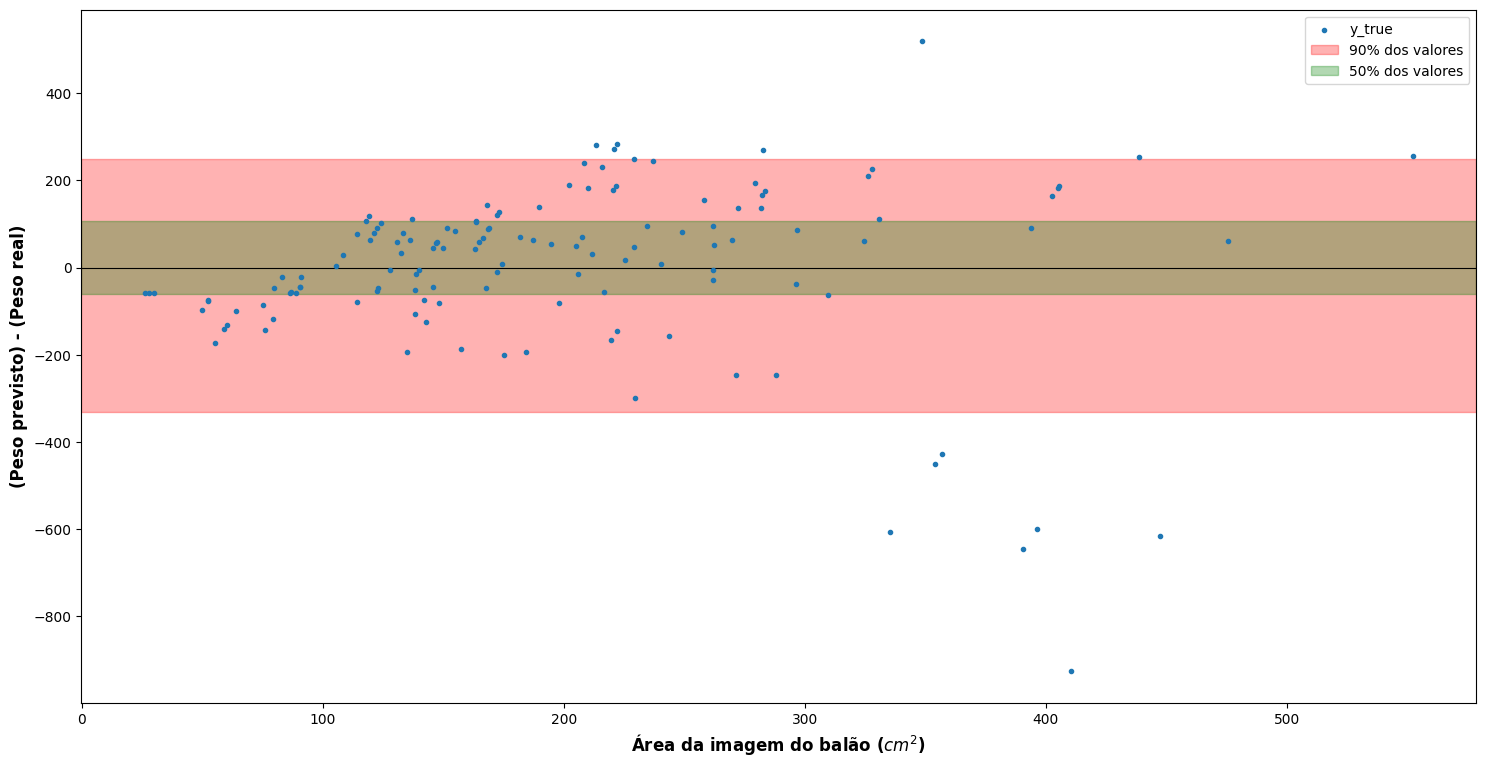

In [25]:
# Define o tamanho do gráfico
plt.figure(figsize = (18, 9))

# Acrescenta os dados originais
plt.scatter(x = X, y = df_regressao_linear["diff_true_pred"], marker = ".", label = "y_true", zorder = 5)

# Cria uma reta horizontal no 0
plt.axhline(y = 0, color = "k", zorder = 2, lw = 0.8)

# Define as legendas para o eixo x e y, respectivamente
plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "(Peso previsto) - (Peso real)", fontsize = 12, fontweight = "bold")

# Define os percentuais mínimo e máximo
minimo = 5
maximo = 95
diff = (maximo - minimo)

# Cria uma faixa horizontal
plt.axhspan(ymin = df_percentis[df_percentis.index == minimo]["diff_true_pred"].iloc[0], 
            ymax = df_percentis[df_percentis.index == maximo]["diff_true_pred"].iloc[0], 
            alpha = 0.3, color = "r", zorder = 1, label = f"{diff}% dos valores")

# Define os percentuais mínimo e máximo
minimo = 25
maximo = 75
diff = (maximo - minimo)

# Cria uma faixa horizontal
plt.axhspan(ymin = df_percentis[df_percentis.index == minimo]["diff_true_pred"].iloc[0], 
            ymax = df_percentis[df_percentis.index == maximo]["diff_true_pred"].iloc[0], 
            alpha = 0.3, color = "g", zorder = 1, label = f"{diff}% dos valores")

# Apresenta as legendas
plt.legend()

plt.savefig(fname = "../imagens_geradas/powepoint.png", bbox_inches = "tight", dpi = 500)

plt.show()

O modelo está está detectando menos peso em relação ao valor real

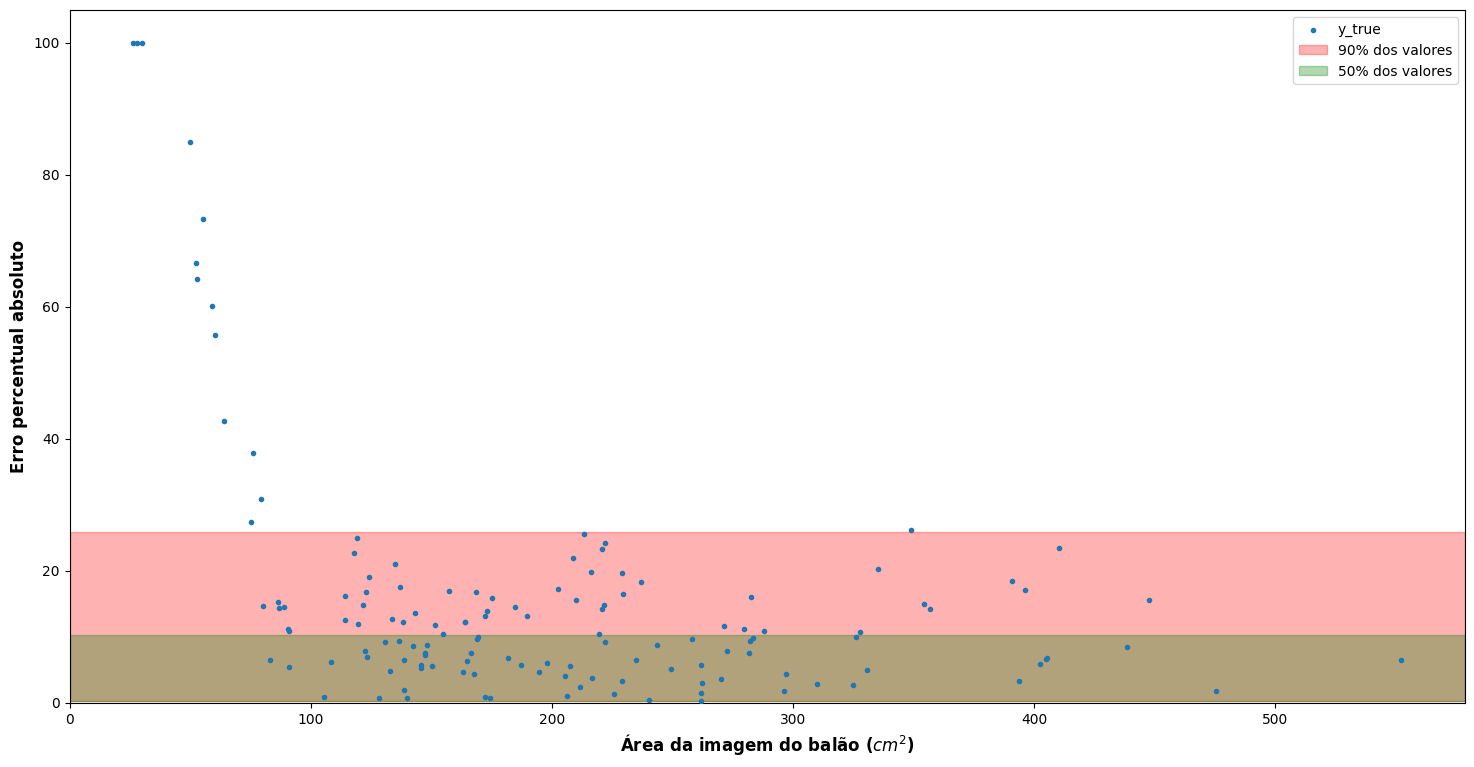

In [28]:
# Define o tamanho do gráfico
plt.figure(figsize = (18, 9))

# Acrescenta os dados originais
plt.scatter(x = X, y = df_regressao_linear["erro_percentual_absoluto"], marker = ".", label = "y_true", zorder = 5)

# Define as legendas para o eixo x e y, respectivamente
plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "Erro percentual absoluto", fontsize = 12, fontweight = "bold")

# Define os percentuais mínimo e máximo
minimo = 0
maximo = 90
diff = (maximo - minimo)

# Cria uma faixa horizontal
plt.axhspan(ymin = df_percentis[df_percentis.index == minimo]["erro_percentual_absoluto"].iloc[0], 
            ymax = df_percentis[df_percentis.index == maximo]["erro_percentual_absoluto"].iloc[0], 
            alpha = 0.3, color = "r", zorder = 1, label = f"{diff}% dos valores")

# Define os percentuais mínimo e máximo
minimo = 0
maximo = 50
diff = (maximo - minimo)

# Cria uma faixa horizontal
plt.axhspan(ymin = df_percentis[df_percentis.index == minimo]["erro_percentual_absoluto"].iloc[0], 
            ymax = df_percentis[df_percentis.index == maximo]["erro_percentual_absoluto"].iloc[0], 
            alpha = 0.3, color = "g", zorder = 1, label = f"{diff}% dos valores")

# Apresenta as legendas
plt.legend()

# Limita a escala do eixo y
plt.ylim(bottom = 0)

plt.savefig(fname = "../imagens_geradas/powepoint.png", bbox_inches = "tight", dpi = 500)

plt.show()

## 4. Considerando que os dados apresentam o seguinte comportamento

$$V = \frac{A^{\frac{3}{2}}}{6 \sqrt{\pi}}$$

peso = a * (area ** b)

a = 1.34112
b = 1.28196

In [ ]:
peso = a * (area ** b)

a = 1.34112
b = 1.28196

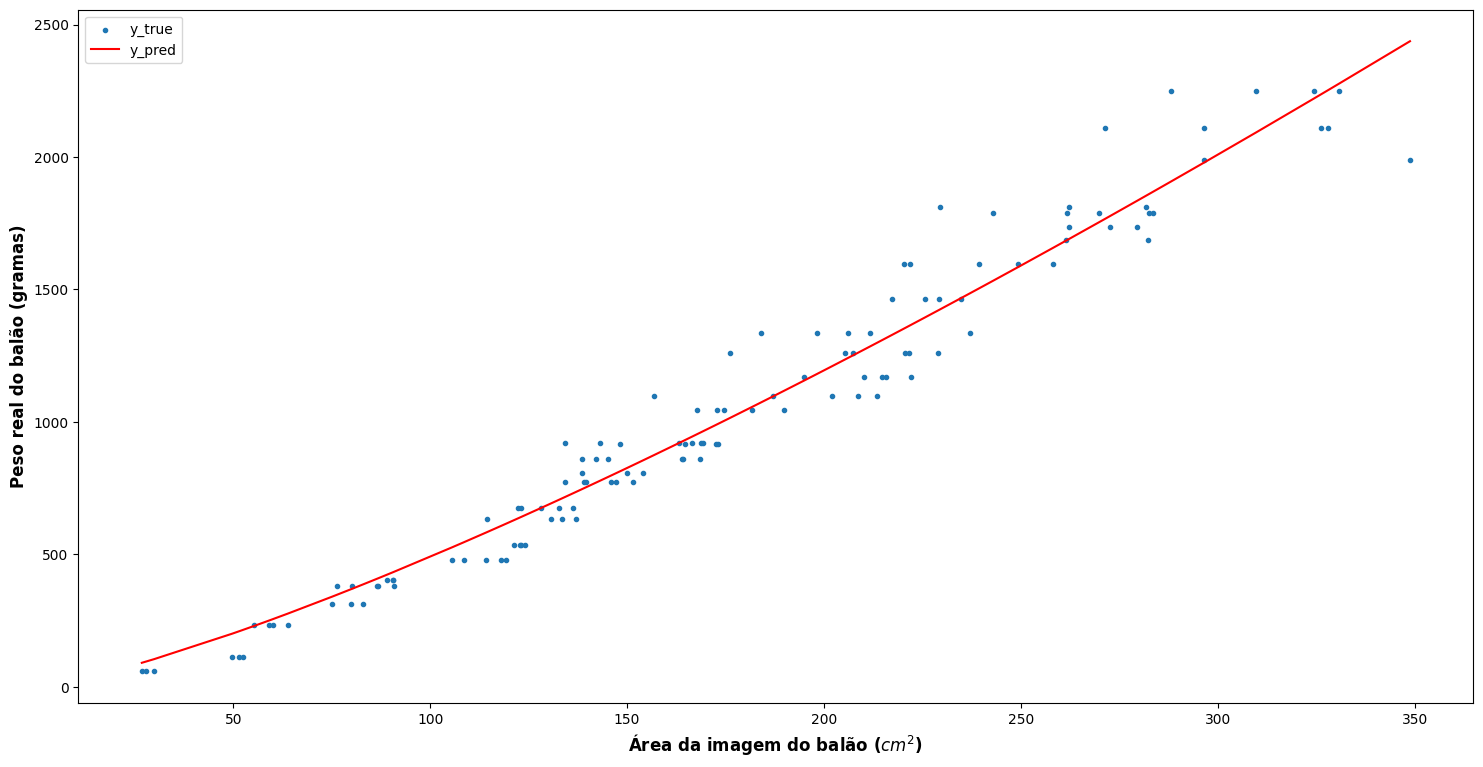

In [86]:
X_ordenado = np.sort(a = X)
# y_esfera = (X_ordenado ** (3 / 2)) / 6 * np.sqrt(np.pi)

a = 1.34112
b = 1.28196
y_esfera = a * (X_ordenado ** b)

plt.figure(figsize = (18, 9))

plt.scatter(x = X, y = y, marker = ".", label = "y_true")
plt.plot(X_ordenado, y_esfera, color = "r", label = "y_pred")

plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "Peso real do balão (gramas)", fontsize = 12, fontweight = "bold")

plt.legend()

plt.show()

In [87]:
# Define o vetor de rótulos real e o previsto
y_true = y
y_pred = a * (X_ordenado ** b)

# Apresenta as principais métricas de desempenho
print("R2:", r2_score(y_true, y_pred).round(decimals = 3))
print("Erro médio absoluto:", mean_absolute_error(y_true, y_pred).round(decimals = 3))
print("Erro percentual absoluto médio:", (mean_absolute_percentage_error(y_true, y_pred) * 100).round(decimals = 3))

R2: 0.067
Erro médio absoluto: 349.643
Erro percentual absoluto médio: 55.829


## 5. Considerando que os dados apresentam o seguinte comportamento

$$
\begin{array}{c}
    \Large V = ax^2 + bx + c
\end{array}
$$

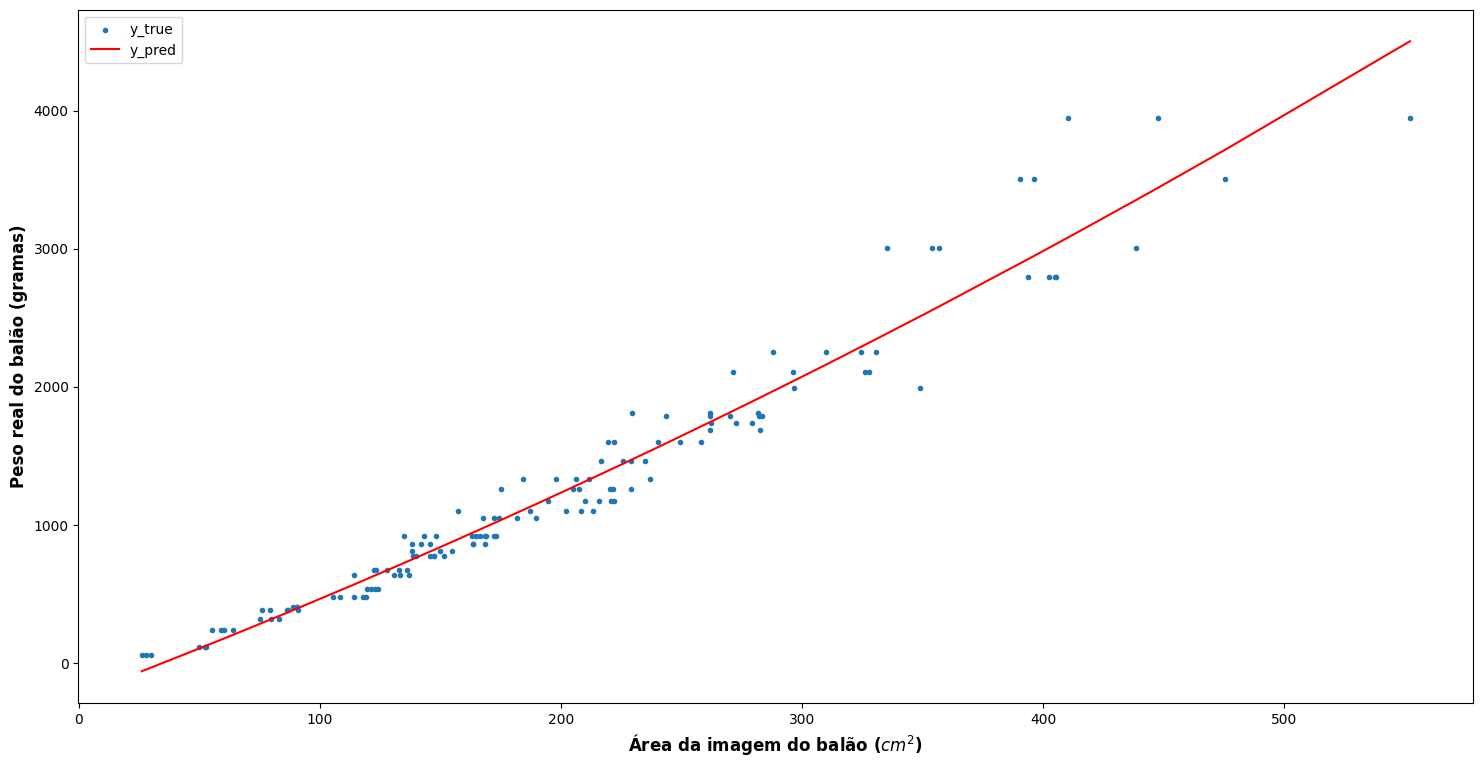

In [29]:
X_ordenado = np.sort(a = X)

plt.figure(figsize = (18, 9))

plt.scatter(x = X, y = y, marker = ".", label = "y_true")

coef = np.polyfit(x = X, y = y, deg = 2)
pol = np.poly1d(coef)
y_pol = pol(X_ordenado)

plt.plot(X_ordenado, y_pol, color = "r", label = "y_pred")

plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "Peso real do balão (gramas)", fontsize = 12, fontweight = "bold")

plt.legend()

plt.savefig(fname = "../imagens_geradas/powepoint.png", bbox_inches = "tight", dpi = 500)

plt.show()

In [30]:
# Define o vetor de rótulos real e o previsto
y_true = y
y_pred = pol(X)

# Apresenta as principais métricas de desempenho
print("R2:", r2_score(y_true, y_pred).round(decimals = 3))
print("Erro médio absoluto:", mean_absolute_error(y_true, y_pred).round(decimals = 3))
print("Erro percentual absoluto médio:", (mean_absolute_percentage_error(y_true, y_pred) * 100).round(decimals = 3))

R2: 0.952
Erro médio absoluto: 127.935
Erro percentual absoluto médio: 13.801


## 6. Considerando que os dados apresentam o seguinte comportamento (MELHOR)

$$
\begin{array}{c}
    \Large V = ax^3 + bx^2 + cx + d
\end{array}
$$

### 6.1. Considerando todas as imagens

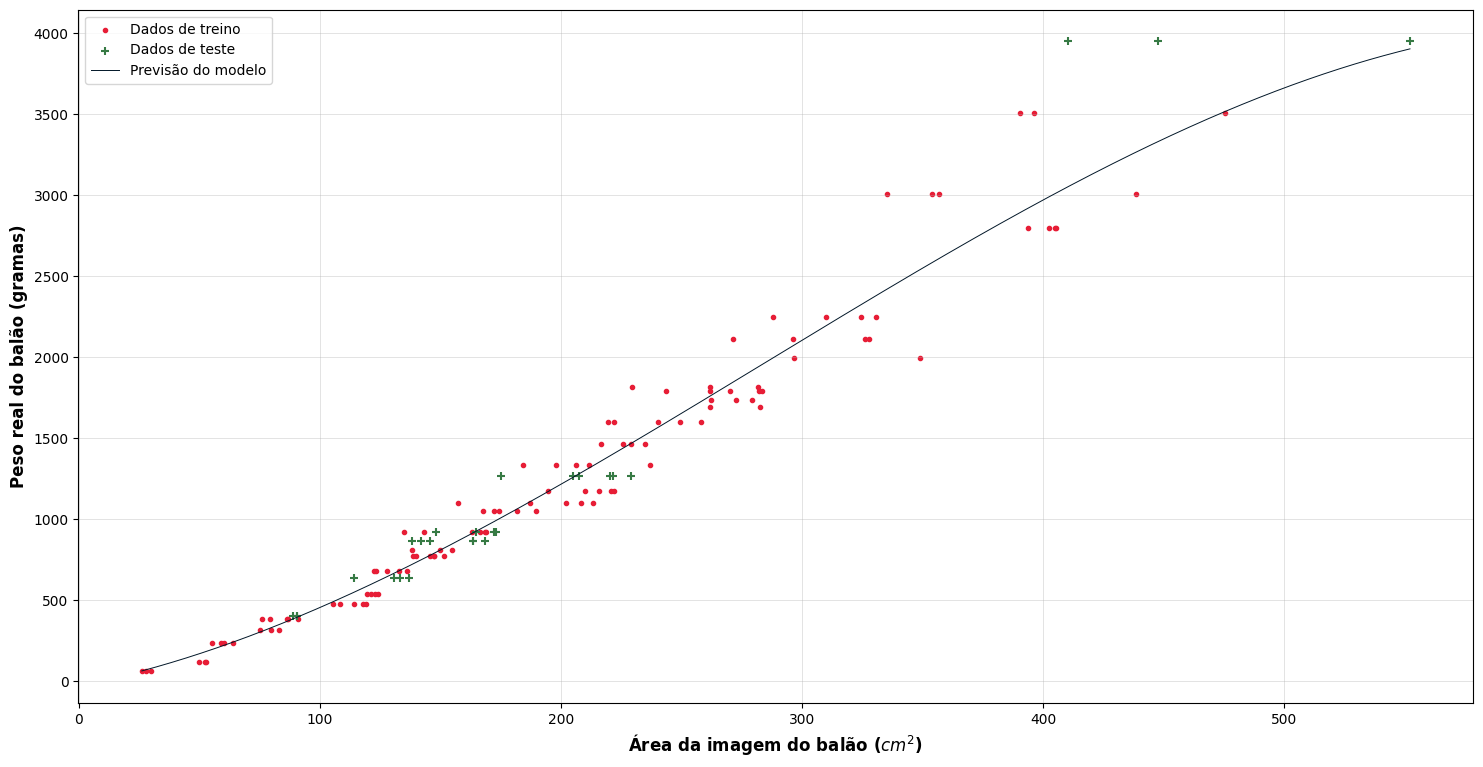

In [86]:
# Define o tamanho do gráfico
plt.figure(figsize = (18, 9))

# Cria os pontos representando os dados originais DE TREINO
plt.scatter(x = X_treino, y = y_treino, marker = ".", color = "#e71d36", label = "Dados de treino")
plt.scatter(x = X_teste, y = y_teste, marker = "+", color = "#367A44", label = "Dados de teste")

# Obtém os coeficientes da regressão polinomial
coef = np.polyfit(x = X_treino, y = y_treino, deg = 3)

# Cria o polinômio
pol = np.poly1d(coef)

minimo = np.min([np.min(X_treino), np.min(X_teste)])
maximo = np.max([np.max(X_treino), np.max(X_teste)])

# Obtém os valores do polinômio -> valores preditos
X_ordenado = np.linspace(minimo, maximo, int((maximo - minimo) * 20))
y_pol = pol(X_ordenado)

# Cria uma curva representando a previsão do modelo
plt.plot(X_ordenado, y_pol, color = "#011627", lw = 0.7, label = "Previsão do modelo")

# Define as legendas para os eixos x e y, respectivamente
plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "Peso real do balão (gramas)", fontsize = 12, fontweight = "bold")

# Apresenta as legenda
plt.legend()

plt.grid(alpha = 0.5, lw = 0.5, ls = "-")

plt.show()

In [87]:
# Define o vetor de rótulos real e o previsto
y_true = y_teste
y_pred = pol(X_teste)

# Apresenta as principais métricas de desempenho
print("R2:", r2_score(y_true, y_pred).round(decimals = 3))
print("Erro médio absoluto:", mean_absolute_error(y_true, y_pred).round(decimals = 3))
print("Erro percentual absoluto médio:", (mean_absolute_percentage_error(y_true, y_pred) * 100).round(decimals = 3))

R2: 0.947
Erro médio absoluto: 130.575
Erro percentual absoluto médio: 9.15


### 6.2. Considerando a média

In [115]:
# Cria um dataframe com a média da área do balão por ID
df_treino_aux = df_treino.groupby(by = "id")[["peso_gramas", "cm2_balao"]].mean().round(decimals = 2)
df_teste_aux = df_teste.groupby(by = "id")[["peso_gramas", "cm2_balao"]].mean().round(decimals = 2)

# Exibe o dataframe
display(df_treino_aux.sample(5))

,peso_gramas,cm2_balao
id,,
30,1990.0,322.81
18,1170.0,212.69
11,808.0,147.71
29,477.0,113.06
13,1464.0,226.53


In [116]:
# Define a matriz de projeto e o vetor de rótulos
X_treino_media = df_treino_aux["cm2_balao"].values
y_treino_media = df_treino_aux["peso_gramas"].values

X_teste_media = df_teste_aux["cm2_balao"].values
y_teste_media = df_teste_aux["peso_gramas"].values

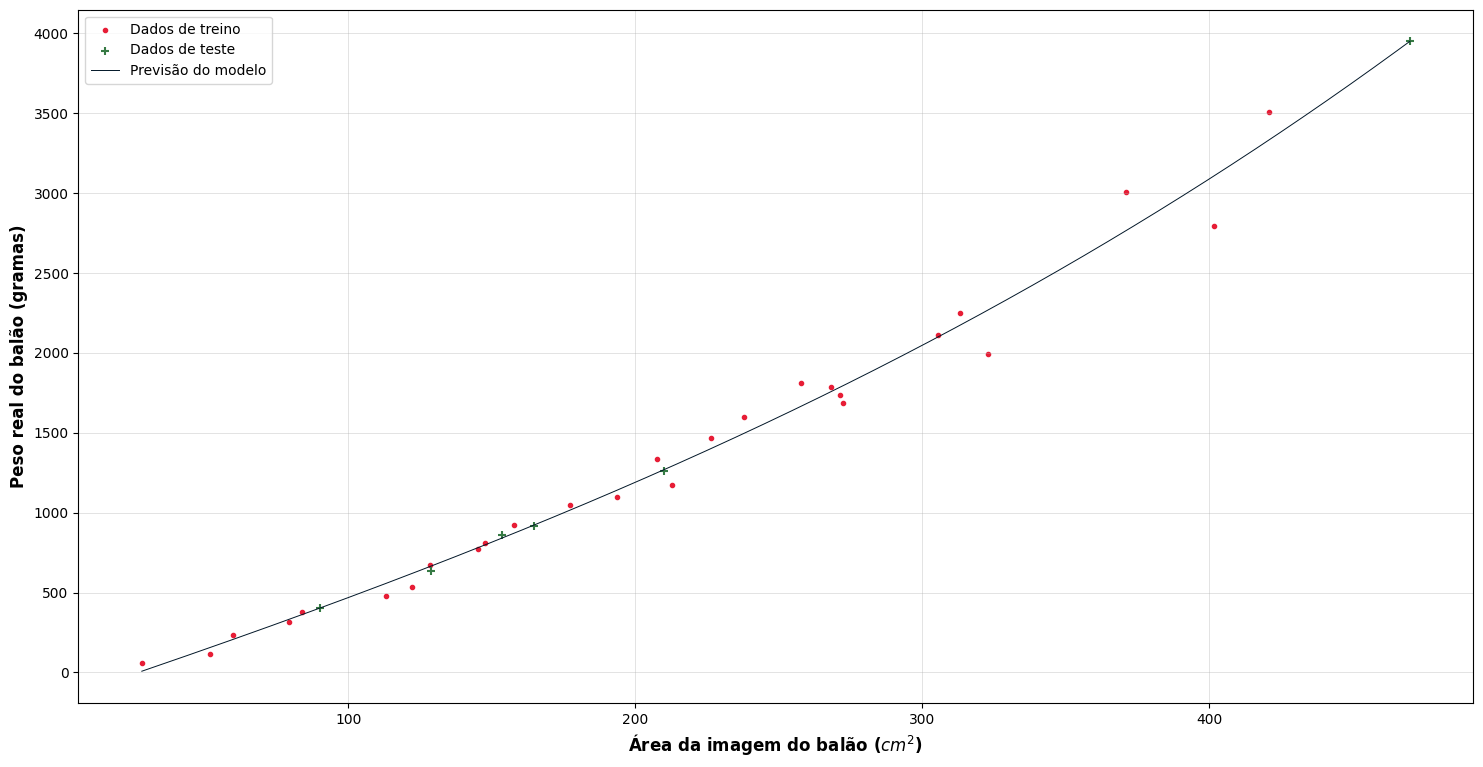

In [117]:
# Define o tamanho do gráfico
plt.figure(figsize = (18, 9))

# Cria os pontos representando os dados originais DE TREINO
plt.scatter(x = X_treino_media, y = y_treino_media, marker = ".", color = "#e71d36", label = "Dados de treino")
plt.scatter(x = X_teste_media, y = y_teste_media, marker = "+", color = "#367A44", label = "Dados de teste")

# Obtém os coeficientes da regressão polinomial
coef = np.polyfit(x = X_treino_media, y = y_treino_media, deg = 3)

# Cria o polinômio
pol = np.poly1d(coef)

minimo = np.min([np.min(X_treino_media), np.min(X_teste_media)])
maximo = np.max([np.max(X_treino_media), np.max(X_teste_media)])

# Obtém os valores do polinômio -> valores preditos
X_ordenado = np.linspace(minimo, maximo, int((maximo - minimo) * 20))
y_pol = pol(X_ordenado)

# Cria uma curva representando a previsão do modelo
plt.plot(X_ordenado, y_pol, color = "#011627", lw = 0.7, label = "Previsão do modelo")

# Define as legendas para os eixos x e y, respectivamente
plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "Peso real do balão (gramas)", fontsize = 12, fontweight = "bold")

# Apresenta as legenda
plt.legend()

plt.grid(alpha = 0.5, lw = 0.5, ls = "-")

plt.show()

In [118]:
# Define o vetor de rótulos real e o previsto
y_true = y_teste_media
y_pred = pol(X_teste_media)

# Limita para valores negativos sejam iguais a zero
y_pred = np.clip(a = y_pred, a_min = 0, a_max = float("inf"))

# Apresenta as principais métricas de desempenho
print("R2:", r2_score(y_true, y_pred).round(decimals = 3))
print("Erro médio absoluto:", mean_absolute_error(y_true, y_pred).round(decimals = 3))
print("Erro percentual absoluto médio:", (mean_absolute_percentage_error(y_true, y_pred) * 100).round(decimals = 3))

R2: 1.0
Erro médio absoluto: 10.314
Erro percentual absoluto médio: 1.403


### 6.3. Considerando as fotos mais distantes

In [121]:
# Lista que conterá os índices das melhores imagens (mais próximas)
lista_melhores_indices = []

# Percorre todos os IDs
for id in df_treino.id.unique():

    # Pega o maior ID, visto que as primeiras fotos eram as mais próximas
    indice = df_treino[df_treino["id"] == id].index.min()

    # Adiciona o índice à lista
    lista_melhores_indices.append(indice)

# Filta o dataframe com base na lista obtida
df_treino_aux = df_treino[df_treino.index.isin(lista_melhores_indices)]

#=================================================================================================

# Lista que conterá os índices das melhores imagens (mais próximas)
lista_melhores_indices = []

# Percorre todos os IDs
for id in df_teste.id.unique():

    # Pega o maior ID, visto que as primeiras fotos eram as mais próximas
    indice = df_teste[df_teste["id"] == id].index.min()

    # Adiciona o índice à lista
    lista_melhores_indices.append(indice)

# Filta o dataframe com base na lista obtida
df_teste_aux = df_teste[df_teste.index.isin(lista_melhores_indices)]

# Exibe o dataframe
display(df_treino_aux.sample(3))
display(df_teste_aux.sample(3))

,id,peso_gramas,segmentacoes_bexiga,media_pixels_bexiga,segmentacoes_celular,media_pixels_celular,cm2_balao
52,13,1464,1,891041.0,2,405720.0,225.593344
113,28,1688,1,747657.0,2,271696.5,282.665868
46,12,773,1,224106.0,1,156114.0,147.457424


,id,peso_gramas,segmentacoes_bexiga,media_pixels_bexiga,segmentacoes_celular,media_pixels_celular,cm2_balao
14,5,402,1,538095.0,2,621170.0,88.982273
106,25,634,1,172291.0,1,154899.0,114.253362
17,6,917,1,386231.0,1,230333.0,172.244743


In [122]:
# Define a matriz de projeto e o vetor de rótulos
X_treino_media = df_treino_aux["cm2_balao"].values
y_treino_media = df_treino_aux["peso_gramas"].values

X_teste_media = df_teste_aux["cm2_balao"].values
y_teste_media = df_teste_aux["peso_gramas"].values

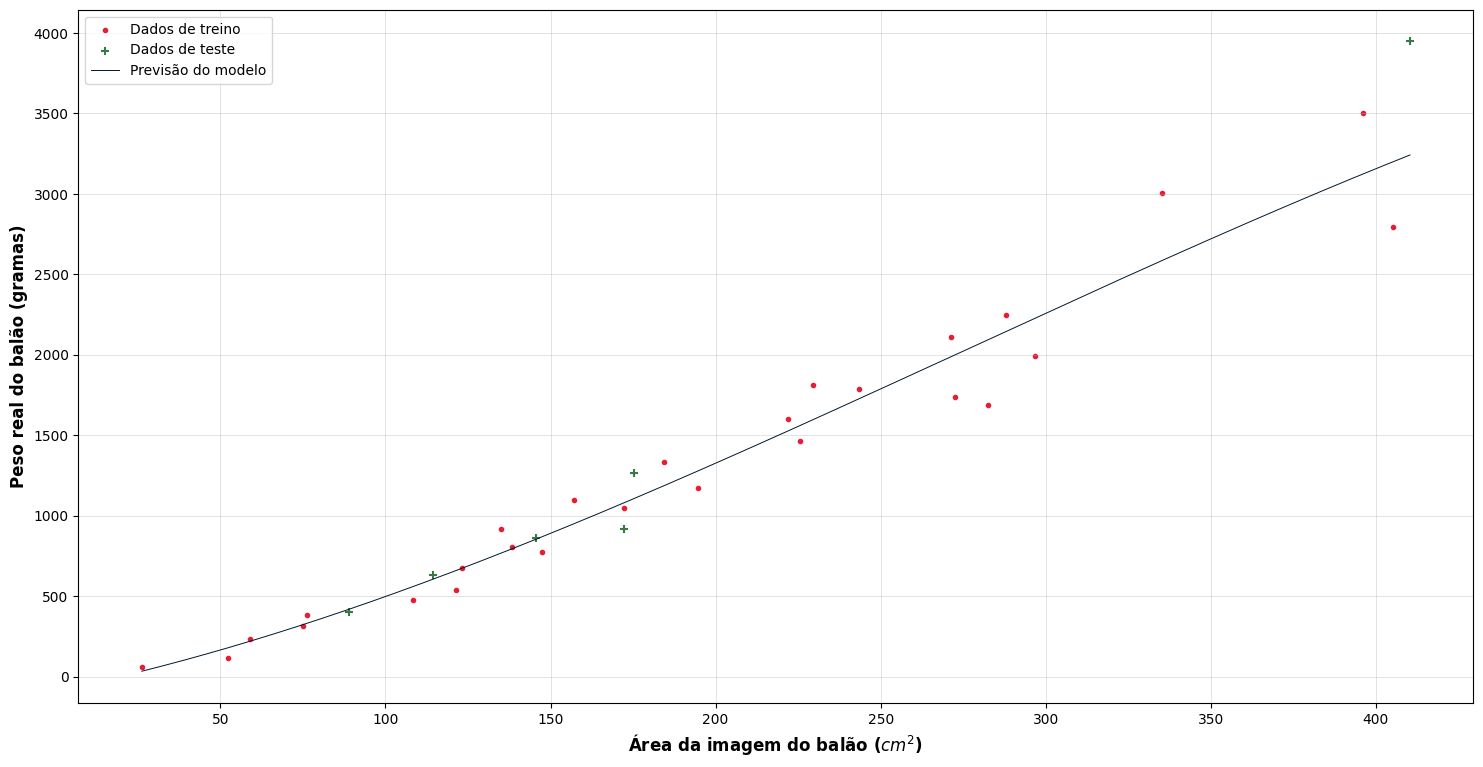

In [123]:
# Define o tamanho do gráfico
plt.figure(figsize = (18, 9))

# Cria os pontos representando os dados originais DE TREINO
plt.scatter(x = X_treino_media, y = y_treino_media, marker = ".", color = "#e71d36", label = "Dados de treino")
plt.scatter(x = X_teste_media, y = y_teste_media, marker = "+", color = "#367A44", label = "Dados de teste")

# Obtém os coeficientes da regressão polinomial
coef = np.polyfit(x = X_treino_media, y = y_treino_media, deg = 3)

# Cria o polinômio
pol = np.poly1d(coef)

minimo = np.min([np.min(X_treino_media), np.min(X_teste_media)])
maximo = np.max([np.max(X_treino_media), np.max(X_teste_media)])

# Obtém os valores do polinômio -> valores preditos
X_ordenado = np.linspace(minimo, maximo, int((maximo - minimo) * 20))
y_pol = pol(X_ordenado)

# Cria uma curva representando a previsão do modelo
plt.plot(X_ordenado, y_pol, color = "#011627", lw = 0.7, label = "Previsão do modelo")

# Define as legendas para os eixos x e y, respectivamente
plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "Peso real do balão (gramas)", fontsize = 12, fontweight = "bold")

# Apresenta as legenda
plt.legend()

plt.grid(alpha = 0.5, lw = 0.5, ls = "-")

plt.show()

In [124]:
# Define o vetor de rótulos real e o previsto
y_true = y_teste_media
y_pred = pol(X_teste_media)

# Limita para valores negativos sejam iguais a zero
y_pred = np.clip(a = y_pred, a_min = 0, a_max = float("inf"))

# Apresenta as principais métricas de desempenho
print("R2:", r2_score(y_true, y_pred).round(decimals = 3))
print("Erro médio absoluto:", mean_absolute_error(y_true, y_pred).round(decimals = 3))
print("Erro percentual absoluto médio:", (mean_absolute_percentage_error(y_true, y_pred) * 100).round(decimals = 3))

R2: 0.936
Erro médio absoluto: 180.091
Erro percentual absoluto médio: 9.631


### 6.4. Considerando as fotos mais próximas

In [125]:
# Lista que conterá os índices das melhores imagens (mais próximas)
lista_melhores_indices = []

# Percorre todos os IDs
for id in df_treino.id.unique():

    # Pega o maior ID, visto que as primeiras fotos eram as mais próximas
    indice = df_treino[df_treino["id"] == id].index.max()

    # Adiciona o índice à lista
    lista_melhores_indices.append(indice)

# Filta o dataframe com base na lista obtida
df_treino_aux = df_treino[df_treino.index.isin(lista_melhores_indices)]

#=================================================================================================

# Lista que conterá os índices das melhores imagens (mais próximas)
lista_melhores_indices = []

# Percorre todos os IDs
for id in df_teste.id.unique():

    # Pega o maior ID, visto que as primeiras fotos eram as mais próximas
    indice = df_teste[df_teste["id"] == id].index.max()

    # Adiciona o índice à lista
    lista_melhores_indices.append(indice)

# Filta o dataframe com base na lista obtida
df_teste_aux = df_teste[df_teste.index.isin(lista_melhores_indices)]

# Exibe o dataframe
display(df_treino_aux.sample(3))
display(df_teste_aux.sample(3))

,id,peso_gramas,segmentacoes_bexiga,media_pixels_bexiga,segmentacoes_celular,media_pixels_celular,cm2_balao
88,20,1813,1,5352993.0,2,1952025.5,281.686608
105,24,1598,1,3877294.0,2,1543194.5,258.085186
30,8,675,1,3149207.0,2,2372562.0,136.344822


,id,peso_gramas,segmentacoes_bexiga,media_pixels_bexiga,segmentacoes_celular,media_pixels_celular,cm2_balao
42,10,861,1,3197224.0,2,2005908.0,163.725779
16,5,402,1,2160742.0,2,2446931.0,90.706039
20,6,917,1,3203094.0,2,1902131.5,172.975326


In [126]:
# Define a matriz de projeto e o vetor de rótulos
X_treino_media = df_treino_aux["cm2_balao"].values
y_treino_media = df_treino_aux["peso_gramas"].values

X_teste_media = df_teste_aux["cm2_balao"].values
y_teste_media = df_teste_aux["peso_gramas"].values

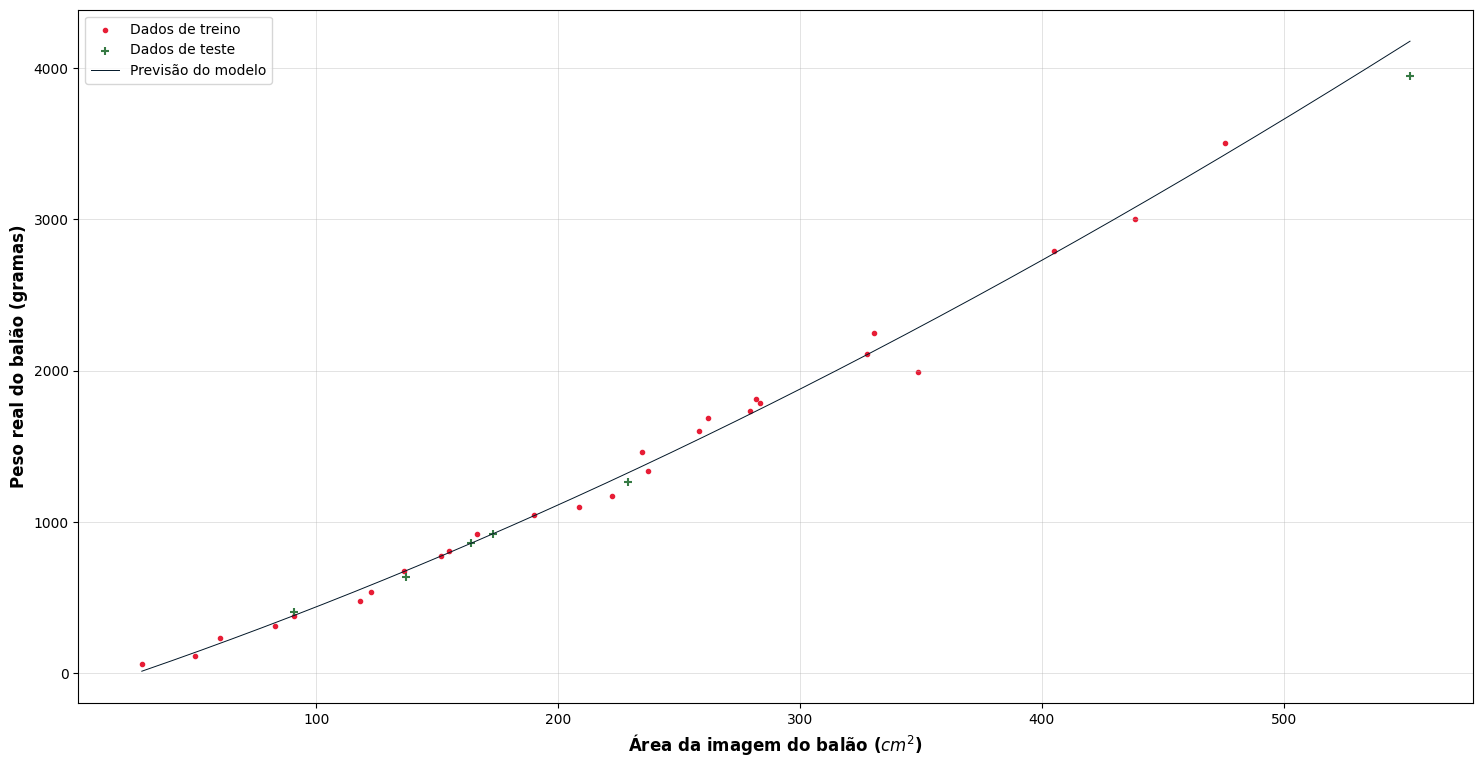

In [127]:
# Define o tamanho do gráfico
plt.figure(figsize = (18, 9))

# Cria os pontos representando os dados originais DE TREINO
plt.scatter(x = X_treino_media, y = y_treino_media, marker = ".", color = "#e71d36", label = "Dados de treino")
plt.scatter(x = X_teste_media, y = y_teste_media, marker = "+", color = "#367A44", label = "Dados de teste")

# Obtém os coeficientes da regressão polinomial
coef = np.polyfit(x = X_treino_media, y = y_treino_media, deg = 3)

# Cria o polinômio
pol = np.poly1d(coef)

minimo = np.min([np.min(X_treino_media), np.min(X_teste_media)])
maximo = np.max([np.max(X_treino_media), np.max(X_teste_media)])

# Obtém os valores do polinômio -> valores preditos
X_ordenado = np.linspace(minimo, maximo, int((maximo - minimo) * 20))
y_pol = pol(X_ordenado)

# Cria uma curva representando a previsão do modelo
plt.plot(X_ordenado, y_pol, color = "#011627", lw = 0.7, label = "Previsão do modelo")

# Define as legendas para os eixos x e y, respectivamente
plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "Peso real do balão (gramas)", fontsize = 12, fontweight = "bold")

# Apresenta as legenda
plt.legend()

plt.grid(alpha = 0.5, lw = 0.5, ls = "-")

plt.show()

In [128]:
# Define o vetor de rótulos real e o previsto
y_true = y_teste_media
y_pred = pol(X_teste_media)

# Limita para valores negativos sejam iguais a zero
y_pred = np.clip(a = y_pred, a_min = 0, a_max = float("inf"))

# Apresenta as principais métricas de desempenho
print("R2:", r2_score(y_true, y_pred).round(decimals = 3))
print("Erro médio absoluto:", mean_absolute_error(y_true, y_pred).round(decimals = 3))
print("Erro percentual absoluto médio:", (mean_absolute_percentage_error(y_true, y_pred) * 100).round(decimals = 3))

R2: 0.993
Erro médio absoluto: 60.971
Erro percentual absoluto médio: 3.973


Cria novas colunas no dataframe

In [137]:
# Cria uma cópia do dataframe original
df_regressao_polinomial_3 = df.copy()

# Cria uma coluna sendo o valor previsto
df_regressao_polinomial_3["y_pred"] = np.clip(a = pol(X.ravel()), a_min = 0, a_max = float("inf"))

# Cria uma coluna sendo a diferença do valor predito para o real
df_regressao_polinomial_3["diff_true_pred"] = df_regressao_polinomial_3["y_pred"] - df_regressao_polinomial_3["peso_gramas"]

# Obtém o erro percentual absoluto
df_regressao_polinomial_3["erro_percentual_absoluto"] = (np.abs(df_regressao_polinomial_3["diff_true_pred"]) / df_regressao_polinomial_3["peso_gramas"]) * 100

# Deixa apenas duas casas decimais
df_regressao_polinomial_3 = df_regressao_polinomial_3.round(decimals = 2)

In [138]:
# Cria um dataframe contendo os percentis das colunas numéricas do dataframe
df_percentis = df_regressao_polinomial_3.quantile(q = [i/20 for i in range(21)]).round(decimals = 1).sort_index(ascending = False)

# Deixa o índice na escala de 0 a 100
df_percentis.index = df_percentis.index * 100

# Apresenta o dataframe com os percentis
display(df_percentis)

,id,peso_gramas,segmentacoes_bexiga,media_pixels_bexiga,segmentacoes_celular,media_pixels_celular,cm2_balao,y_pred,diff_true_pred,erro_percentual_absoluto
100.0,34.0,3948.0,1.0,6361092.0,2.0,2763285.0,552.2,4177.7,293.5,93.0
95.0,32.0,3003.0,1.0,4773926.0,2.0,2306598.1,403.1,2757.9,76.1,28.0
90.0,30.5,2520.5,1.0,3972116.0,2.0,2038809.2,342.0,2226.1,51.5,23.8
85.0,28.8,2109.0,1.0,3168025.2,2.0,1753000.2,296.7,1851.3,29.6,21.2
80.0,25.0,1788.0,1.0,2682167.0,2.0,1473442.5,279.4,1713.4,14.7,18.9
75.0,24.0,1736.0,1.0,2170713.0,2.0,1243894.9,261.7,1574.7,0.8,16.0
70.0,22.0,1598.0,1.0,1903264.5,2.0,1099343.8,232.1,1348.5,-5.2,14.3
65.0,20.0,1334.0,1.0,1642390.2,2.0,1005413.0,221.4,1268.8,-21.0,12.3
60.0,18.0,1262.0,1.0,1534753.0,2.0,869221.5,211.6,1197.2,-26.4,10.9
55.0,17.0,1170.0,1.0,1177433.5,2.0,749037.8,199.1,1106.2,-37.4,8.9


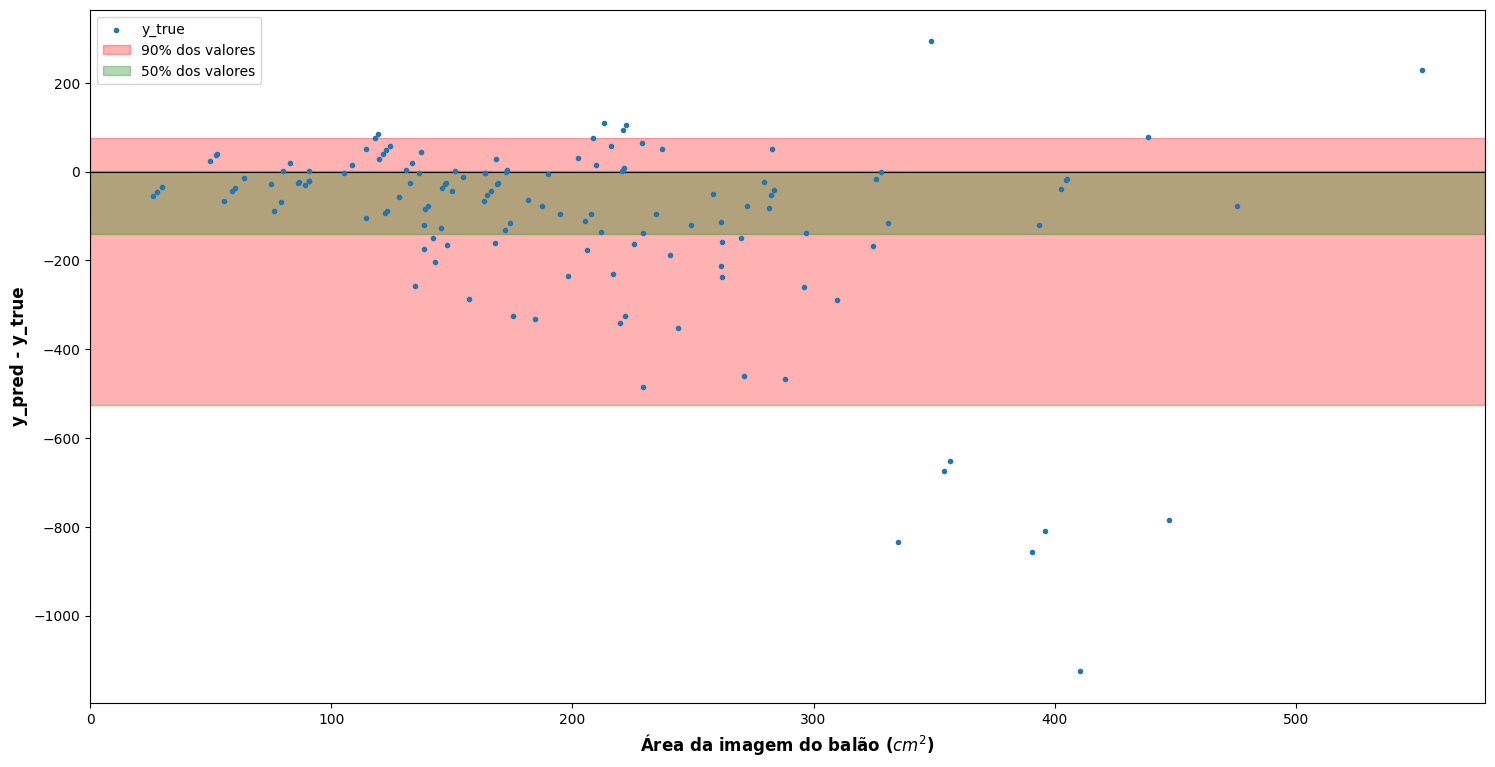

In [139]:
# Define o tamanho do gráfico
plt.figure(figsize = (18, 9))

# Acrescenta os dados originais
plt.scatter(x = X, y = df_regressao_polinomial_3["diff_true_pred"], marker = ".", label = "y_true", zorder = 5)

# Cria uma reta horizontal no 0
plt.axhline(y = 0, color = "k", zorder = 2, lw = 0.8)

# Define as legendas para o eixo x e y, respectivamente
plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "y_pred - y_true", fontsize = 12, fontweight = "bold")

# Define os percentuais mínimo e máximo
minimo = 5
maximo = 95
diff = (maximo - minimo)

# Cria uma faixa horizontal
plt.axhspan(ymin = df_percentis[df_percentis.index == minimo]["diff_true_pred"].iloc[0], 
            ymax = df_percentis[df_percentis.index == maximo]["diff_true_pred"].iloc[0], 
            alpha = 0.3, color = "r", zorder = 1, label = f"{diff}% dos valores")

# Define os percentuais mínimo e máximo
minimo = 25
maximo = 75
diff = (maximo - minimo)

# Cria uma faixa horizontal
plt.axhspan(ymin = df_percentis[df_percentis.index == minimo]["diff_true_pred"].iloc[0], 
            ymax = df_percentis[df_percentis.index == maximo]["diff_true_pred"].iloc[0], 
            alpha = 0.3, color = "g", zorder = 1, label = f"{diff}% dos valores")

# Apresenta as legendas
plt.legend()

plt.savefig(fname = "../imagens_geradas/powepoint2.png", bbox_inches = "tight", dpi = 500)

plt.show()

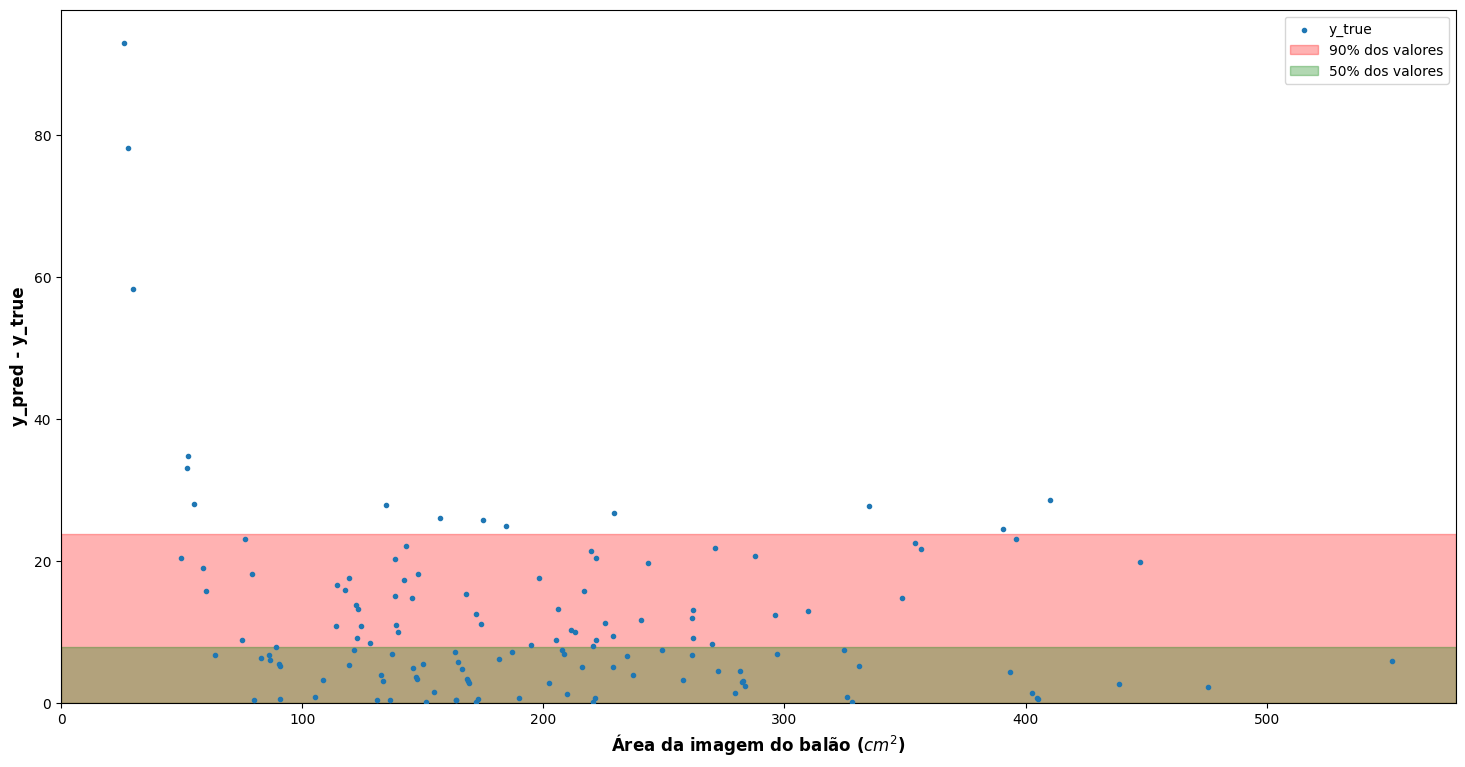

In [140]:
# Define o tamanho do gráfico
plt.figure(figsize = (18, 9))

# Acrescenta os dados originais
plt.scatter(x = X, y = df_regressao_polinomial_3["erro_percentual_absoluto"], marker = ".", label = "y_true", zorder = 5)

# Define as legendas para o eixo x e y, respectivamente
plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "y_pred - y_true", fontsize = 12, fontweight = "bold")

# Define os percentuais mínimo e máximo
minimo = 0
maximo = 90
diff = (maximo - minimo)

# Cria uma faixa horizontal
plt.axhspan(ymin = 0, # df_percentis[df_percentis.index == minimo]["erro_percentual_absoluto"].iloc[0],
            ymax = df_percentis[df_percentis.index == maximo]["erro_percentual_absoluto"].iloc[0], 
            alpha = 0.3, color = "r", zorder = 1, label = f"{diff}% dos valores")

# Define os percentuais mínimo e máximo
minimo = 0
maximo = 50
diff = (maximo - minimo)

# Cria uma faixa horizontal
plt.axhspan(ymin = 0, # ymin = df_percentis[df_percentis.index == minimo]["erro_percentual_absoluto"].iloc[0], 
            ymax = df_percentis[df_percentis.index == maximo]["erro_percentual_absoluto"].iloc[0], 
            alpha = 0.3, color = "g", zorder = 1, label = f"{diff}% dos valores")

# Apresenta as legendas
plt.legend()

# Limita a escala do eixo y
plt.ylim(bottom = 0)

plt.savefig(fname = "../imagens_geradas/powepoint3.png", bbox_inches = "tight", dpi = 500)

plt.show()

In [154]:
# Cria uma cópia do dataframe original
df_regressao_polinomial_3 = df_teste_aux.copy()

# Cria uma coluna sendo o valor previsto
df_regressao_polinomial_3["y_pred"] = np.clip(a = pol(df_teste_aux["cm2_balao"].values), a_min = 0, a_max = float("inf"))

# Cria uma coluna sendo a diferença do valor predito para o real
df_regressao_polinomial_3["diff_true_pred"] = df_regressao_polinomial_3["y_pred"] - df_regressao_polinomial_3["peso_gramas"]

# Obtém o erro percentual absoluto
df_regressao_polinomial_3["erro_percentual_absoluto"] = (np.abs(df_regressao_polinomial_3["diff_true_pred"]) / df_regressao_polinomial_3["peso_gramas"]) * 100

# Deixa apenas duas casas decimais
df_regressao_polinomial_3 = df_regressao_polinomial_3.round(decimals = 2)

In [155]:
# Cria um dataframe contendo os percentis das colunas numéricas do dataframe
df_percentis = df_regressao_polinomial_3.quantile(q = [i/20 for i in range(21)]).round(decimals = 1).sort_index(ascending = False)

# Deixa o índice na escala de 0 a 100
df_percentis.index = df_percentis.index * 100

# Apresenta o dataframe com os percentis
display(df_percentis)

,id,peso_gramas,segmentacoes_bexiga,media_pixels_bexiga,segmentacoes_celular,media_pixels_celular,cm2_balao,y_pred,diff_true_pred,erro_percentual_absoluto
100.0,34.0,3948.0,1.0,4418119.0,2.0,2446931.0,552.2,4177.7,229.7,6.9
95.0,31.8,3276.5,1.0,4402235.8,2.0,2336675.2,471.4,3464.7,188.2,6.6
90.0,29.5,2605.0,1.0,4386352.5,2.0,2226419.5,390.6,2751.6,146.6,6.4
85.0,27.2,1933.5,1.0,4370469.2,2.0,2116163.8,309.8,2038.6,105.1,6.1
80.0,25.0,1262.0,1.0,4354586.0,2.0,2005908.0,229.0,1325.5,63.5,5.8
75.0,22.2,1175.8,1.0,4066713.0,2.0,1999864.2,215.0,1224.4,58.6,5.7
70.0,19.5,1089.5,1.0,3778840.0,2.0,1993820.5,201.0,1123.4,53.7,5.5
65.0,16.8,1003.2,1.0,3490967.0,2.0,1987776.8,187.0,1022.3,48.8,5.3
60.0,14.0,917.0,1.0,3203094.0,2.0,1981733.0,173.0,921.3,43.9,5.2
55.0,13.0,903.0,1.0,3201626.5,2.0,1961832.6,170.7,905.3,34.0,5.1


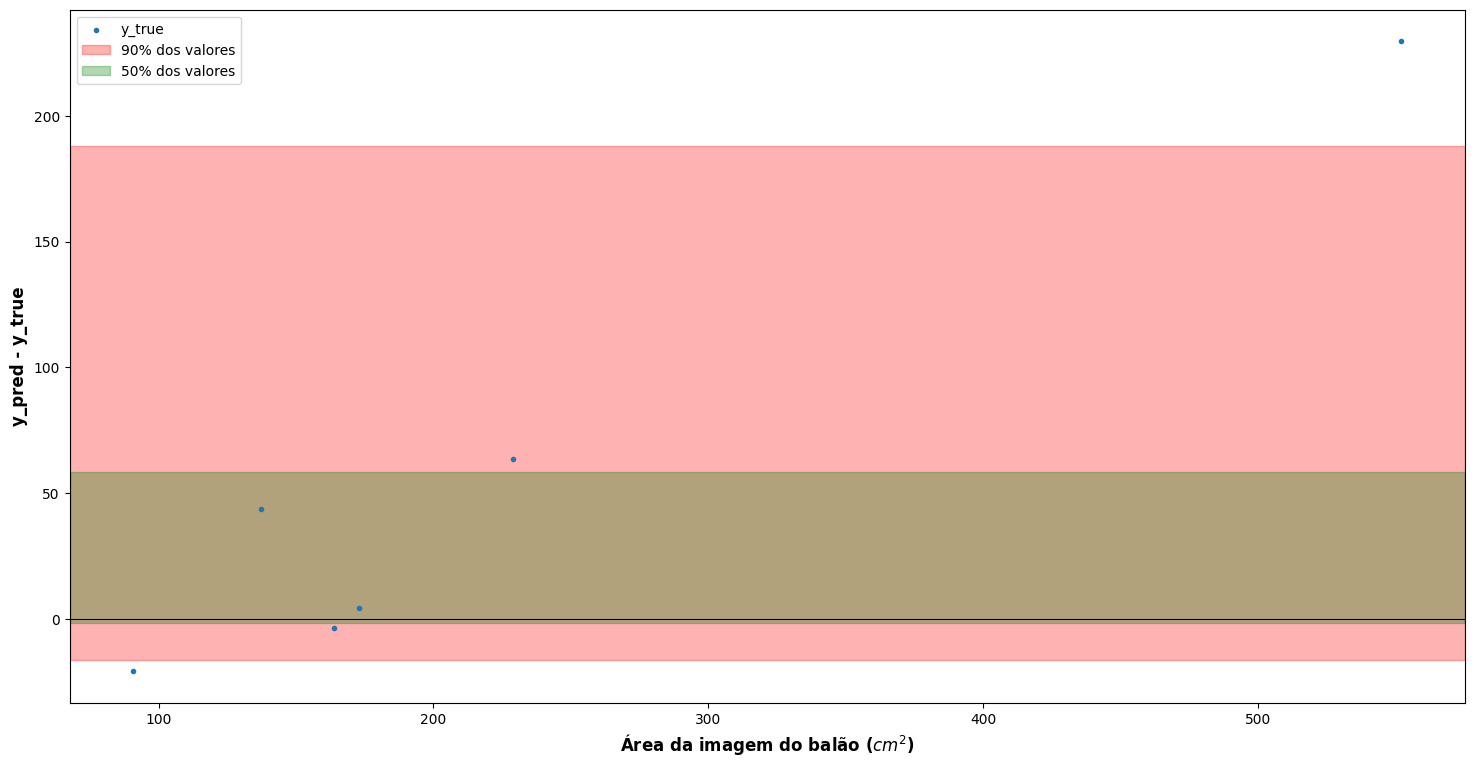

In [156]:
# Define o tamanho do gráfico
plt.figure(figsize = (18, 9))

# Acrescenta os dados originais
plt.scatter(x = df_teste_aux["cm2_balao"].values, y = df_regressao_polinomial_3["diff_true_pred"], marker = ".", label = "y_true", zorder = 5)

# Cria uma reta horizontal no 0
plt.axhline(y = 0, color = "k", zorder = 2, lw = 0.8)

# Define as legendas para o eixo x e y, respectivamente
plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "y_pred - y_true", fontsize = 12, fontweight = "bold")

# Define os percentuais mínimo e máximo
minimo = 5
maximo = 95
diff = (maximo - minimo)

# Cria uma faixa horizontal
plt.axhspan(ymin = df_percentis[df_percentis.index == minimo]["diff_true_pred"].iloc[0], 
            ymax = df_percentis[df_percentis.index == maximo]["diff_true_pred"].iloc[0], 
            alpha = 0.3, color = "r", zorder = 1, label = f"{diff}% dos valores")

# Define os percentuais mínimo e máximo
minimo = 25
maximo = 75
diff = (maximo - minimo)

# Cria uma faixa horizontal
plt.axhspan(ymin = df_percentis[df_percentis.index == minimo]["diff_true_pred"].iloc[0], 
            ymax = df_percentis[df_percentis.index == maximo]["diff_true_pred"].iloc[0], 
            alpha = 0.3, color = "g", zorder = 1, label = f"{diff}% dos valores")

# Apresenta as legendas
plt.legend()

# plt.savefig(fname = "../imagens_geradas/powepoint2.png", bbox_inches = "tight", dpi = 500)

plt.show()

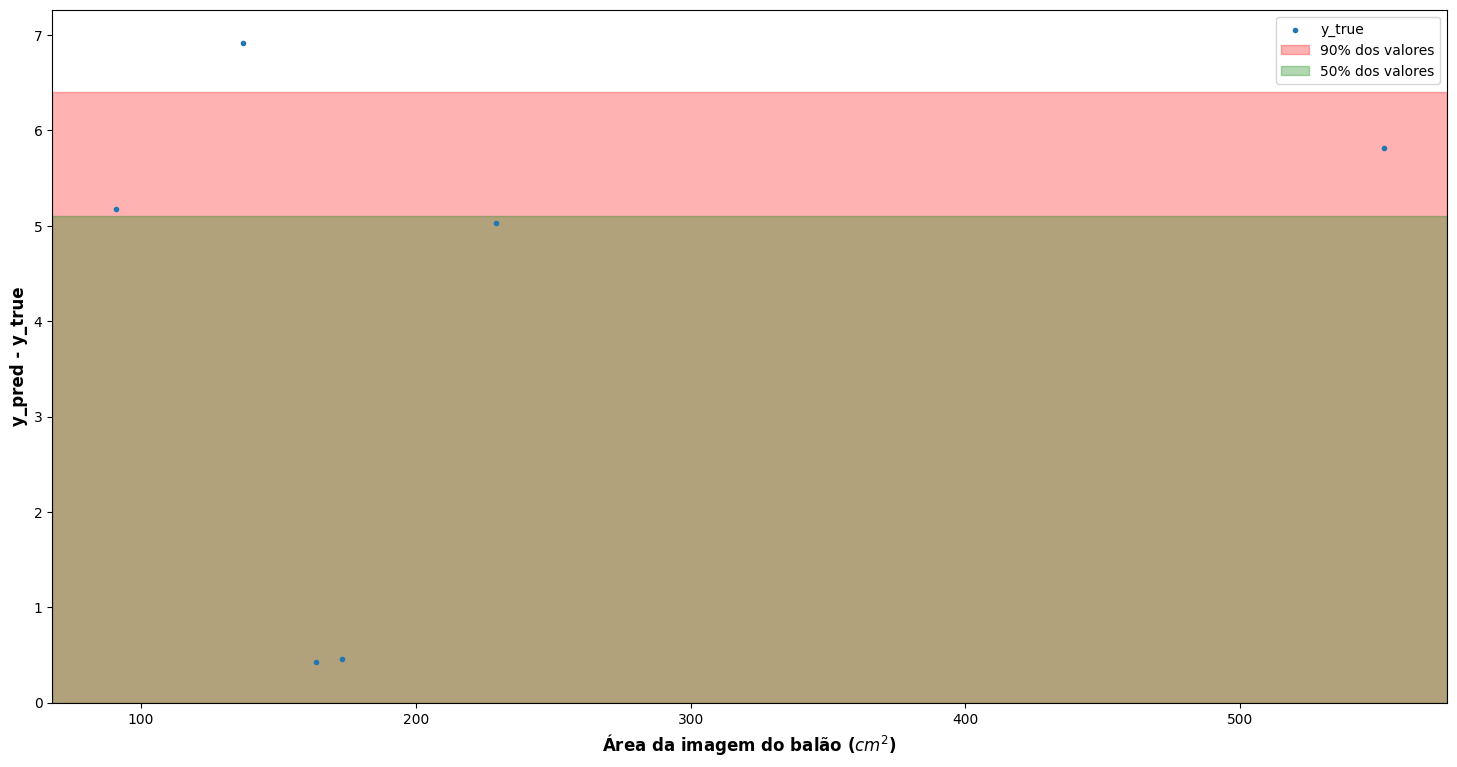

In [157]:
# Define o tamanho do gráfico
plt.figure(figsize = (18, 9))

# Acrescenta os dados originais
plt.scatter(x = df_teste_aux["cm2_balao"].values, y = df_regressao_polinomial_3["erro_percentual_absoluto"], marker = ".", label = "y_true", zorder = 5)

# Define as legendas para o eixo x e y, respectivamente
plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "y_pred - y_true", fontsize = 12, fontweight = "bold")

# Define os percentuais mínimo e máximo
minimo = 0
maximo = 90
diff = (maximo - minimo)

# Cria uma faixa horizontal
plt.axhspan(ymin = 0, # df_percentis[df_percentis.index == minimo]["erro_percentual_absoluto"].iloc[0],
            ymax = df_percentis[df_percentis.index == maximo]["erro_percentual_absoluto"].iloc[0], 
            alpha = 0.3, color = "r", zorder = 1, label = f"{diff}% dos valores")

# Define os percentuais mínimo e máximo
minimo = 0
maximo = 50
diff = (maximo - minimo)

# Cria uma faixa horizontal
plt.axhspan(ymin = 0, # ymin = df_percentis[df_percentis.index == minimo]["erro_percentual_absoluto"].iloc[0], 
            ymax = df_percentis[df_percentis.index == maximo]["erro_percentual_absoluto"].iloc[0], 
            alpha = 0.3, color = "g", zorder = 1, label = f"{diff}% dos valores")

# Apresenta as legendas
plt.legend()

# Limita a escala do eixo y
plt.ylim(bottom = 0)

# plt.savefig(fname = "../imagens_geradas/powepoint3.png", bbox_inches = "tight", dpi = 500)

plt.show()

## 7. Considerando que os dados apresentam o seguinte comportamento

$$
\begin{array}{c}
    \Large V = a * (x^b)
\end{array}
$$

In [107]:
# Modelo da função potencial
def modelo_potencia(x, a, b):
    return a * x ** b

# Ajuste dos parâmetros
parametros, _ = curve_fit(modelo_potencia, X_treino, y_treino)
a, b = parametros

# print(f'Modelo ajustado: y = {a:.4f} * x^{b:.4f}')
display(Math(r'\textrm{Volume} = 1.2046 \cdot (x^{1.3047})'))

minimo = np.min([np.min(X_treino), np.min(X_teste)])
maximo = np.max([np.max(X_treino), np.max(X_teste)])

# Obtém os valores do polinômio -> valores preditos
X_ordenado = np.linspace(minimo, maximo, int((maximo - minimo) * 20))
y_pol = pol(X_ordenado)

# Previsão
y_previsto = modelo_potencia(X_ordenado, a, b)

<IPython.core.display.Math object>

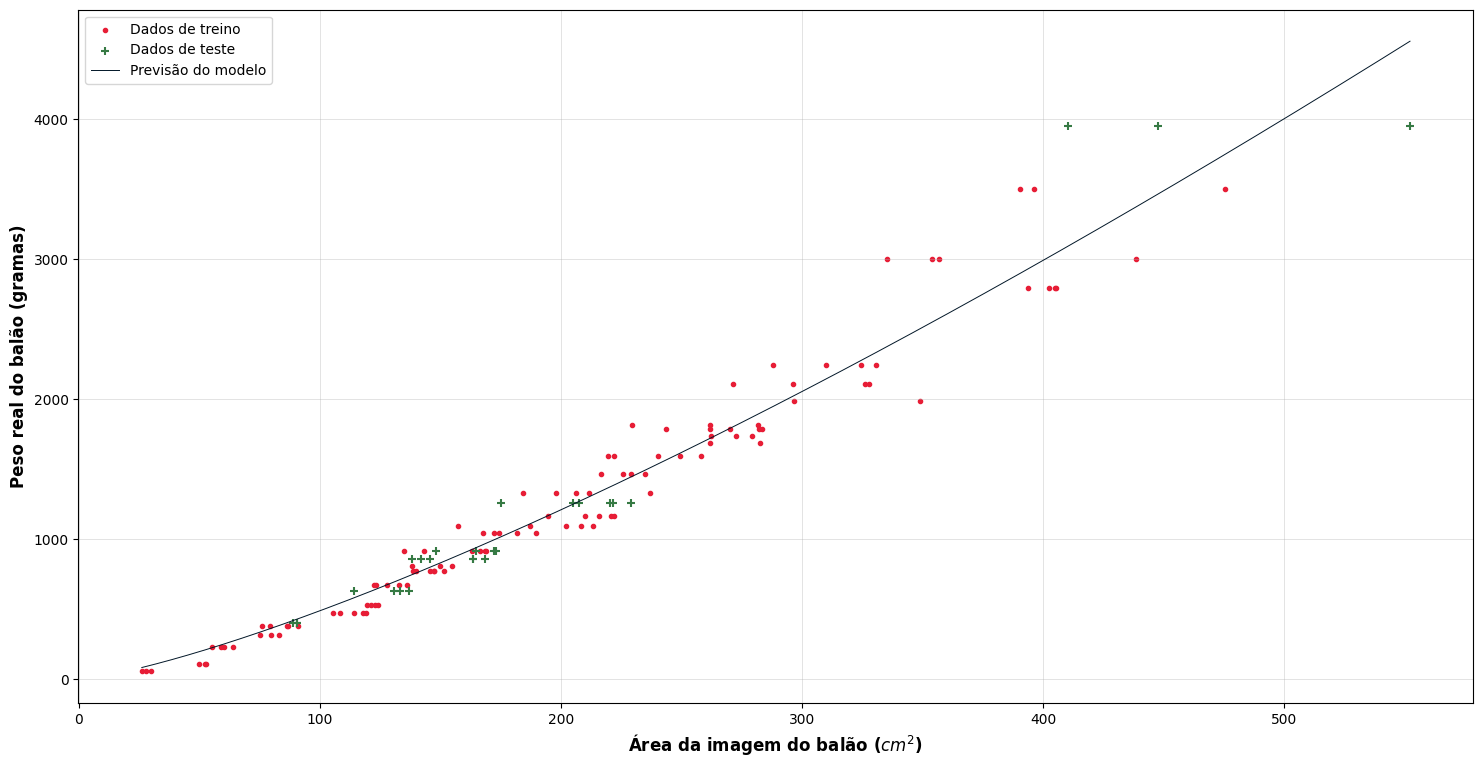

In [108]:
# Define o tamanho do gráfico
plt.figure(figsize = (18, 9))

# Cria os pontos representando os dados originais DE TREINO
plt.scatter(x = X_treino, y = y_treino, marker = ".", color = "#e71d36", label = "Dados de treino")
plt.scatter(x = X_teste, y = y_teste, marker = "+", color = "#367A44", label = "Dados de teste")

# Obtém os coeficientes da regressão polinomial
coef = np.polyfit(x = X_treino, y = y_treino, deg = 3)

# Cria o polinômio
pol = np.poly1d(coef)

minimo = np.min([np.min(X_treino), np.min(X_teste)])
maximo = np.max([np.max(X_treino), np.max(X_teste)])

# Obtém os valores do polinômio -> valores preditos
X_ordenado = np.linspace(minimo, maximo, int((maximo - minimo) * 20))
y_pol = pol(X_ordenado)

# Cria uma curva representando a previsão do modelo
plt.plot(X_ordenado, y_previsto, color = "#011627", lw = 0.7, label = "Previsão do modelo")

# Define as legendas para os eixos x e y, respectivamente
plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "Peso real do balão (gramas)", fontsize = 12, fontweight = "bold")

# Apresenta as legenda
plt.legend()

plt.grid(alpha = 0.5, lw = 0.5, ls = "-")

plt.show()

In [109]:
# Define o vetor de rótulos real e o previsto
y_true = y_teste
y_pred = modelo_potencia(X_teste, a, b)

# Apresenta as principais métricas de desempenho
print("R2:", r2_score(y_true, y_pred).round(decimals = 3))
print("Erro médio absoluto:", mean_absolute_error(y_true, y_pred).round(decimals = 3))
print("Erro percentual absoluto médio:", (mean_absolute_percentage_error(y_true, y_pred) * 100).round(decimals = 3))

R2: 0.942
Erro médio absoluto: 146.109
Erro percentual absoluto médio: 9.99
